# Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def df_processing(df):
    # correct_perfect: detect only 499
    df['correct_perfect'] = False
    df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True
    
    # correct partial: result include 499, it might include other change points.
    df['correct_partial'] = df["Change Points"].str.count("499")
    
    # the number of change points
    df['the number of detected change points'] = df["Change Points"].str.count(",") + 1
    
    # group name
    df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str) + " , n: " + df["n"].astype(str)
    
    return df

In [3]:
def accuracy_table(df, sort = False):
    n_sample = df.groupby("group").count()["Repitition"].unique()
    df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
    df_count["accuracy_perfect"] = df_count["correct_perfect"]/n_sample
    df_count["accuracy_partial"] = df_count["correct_partial"]/n_sample
    
    if sort:
        df_count=df_count.sort_values("accuracy_partial", ascending=False)
    return df_count

In [4]:
group_list = np.array(['rho: 0.0 , SNR: 6.0 , n: 1000', 'rho: 0.3 , SNR: 6.0 , n: 1000',
       'rho: 0.7 , SNR: 6.0 , n: 1000', 'rho: 0.0 , SNR: 3.52 , n: 1000',
       'rho: 0.3 , SNR: 3.52 , n: 1000', 'rho: 0.7 , SNR: 3.52 , n: 1000',
       'rho: 0.0 , SNR: 2.07 , n: 1000', 'rho: 0.3 , SNR: 2.07 , n: 1000',
       'rho: 0.7 , SNR: 2.07 , n: 1000', 'rho: 0.0 , SNR: 1.22 , n: 1000',
       'rho: 0.3 , SNR: 1.22 , n: 1000', 'rho: 0.7 , SNR: 1.22 , n: 1000',
       'rho: 0.0 , SNR: 0.71 , n: 1000', 'rho: 0.3 , SNR: 0.71 , n: 1000',
       'rho: 0.7 , SNR: 0.71 , n: 1000'])

def number_cps_plot(df, name):
    
    fig, ax = plt.subplots(5, 3, figsize=(15, 15))
    for g, ax in zip(group_list, ax.ravel()):
        labels, counts = np.unique(df.loc[df["group"] == g, "the number of detected change points"].values, return_counts = True)
        ax.bar(labels, counts , alpha = 0.7)
        ax.set_title(g)
        ax.set_xlim(0.5, 5.5)
        ax.locator_params(axis = "x", integer = True)
        
    fig.tight_layout()
    fig.suptitle("Accuracy in the number of change points: " + name, fontsize=20).set_y(1.02)
    plt.show()

def opt_gap_plot(df, name):
    bins = np.linspace(0, 1.0, num=20)
    
    fig, ax = plt.subplots(5, 3, figsize=(15, 15))
    
    for g, ax in zip(group_list, ax.ravel()):
        ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 1), "Optimality Gap"], bins, label = "Include actual CP", alpha = 0.7)
        ax.hist(df.loc[(df["group"] == g) & (df["correct_partial"] == 0), "Optimality Gap"], bins, label = "Not include", alpha = 0.7)
        ax.legend()
        ax.set_title(g)
    
    fig.tight_layout()
    fig.suptitle("Optimality Gap for each setting: " + name, fontsize=20).set_y(1.02)
    plt.show()

# Our proposed method

In [5]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')
df = df_processing(df)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:

- Higher SNR is, more accurate result is.
- lower rho, more accurate result is.

In [6]:
df_count = accuracy_table(df)
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,81,97,0.162,0.194
1,0.0,1.22,1000,121,143,0.242,0.286
2,0.0,2.07,1000,206,219,0.412,0.438
3,0.0,3.52,1000,261,265,0.522,0.530
4,0.0,6.00,1000,364,366,0.728,0.732
5,0.3,0.71,1000,51,91,0.102,0.182
6,0.3,1.22,1000,112,146,0.224,0.292
7,0.3,2.07,1000,164,195,0.328,0.390
8,0.3,3.52,1000,246,256,0.492,0.512
9,0.3,6.00,1000,334,337,0.668,0.674


In [7]:
df_count = accuracy_table(df, sort = True)
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,364,366,0.728,0.732
9,0.3,6.00,1000,334,337,0.668,0.674
14,0.7,6.00,1000,304,324,0.608,0.648
3,0.0,3.52,1000,261,265,0.522,0.530
13,0.7,3.52,1000,231,264,0.462,0.528
8,0.3,3.52,1000,246,256,0.492,0.512
2,0.0,2.07,1000,206,219,0.412,0.438
7,0.3,2.07,1000,164,195,0.328,0.390
12,0.7,2.07,1000,115,160,0.230,0.320
6,0.3,1.22,1000,112,146,0.224,0.292


## Estimated number of change points

Findings:

- High rho and less SNR -> the estimated # of cps increases

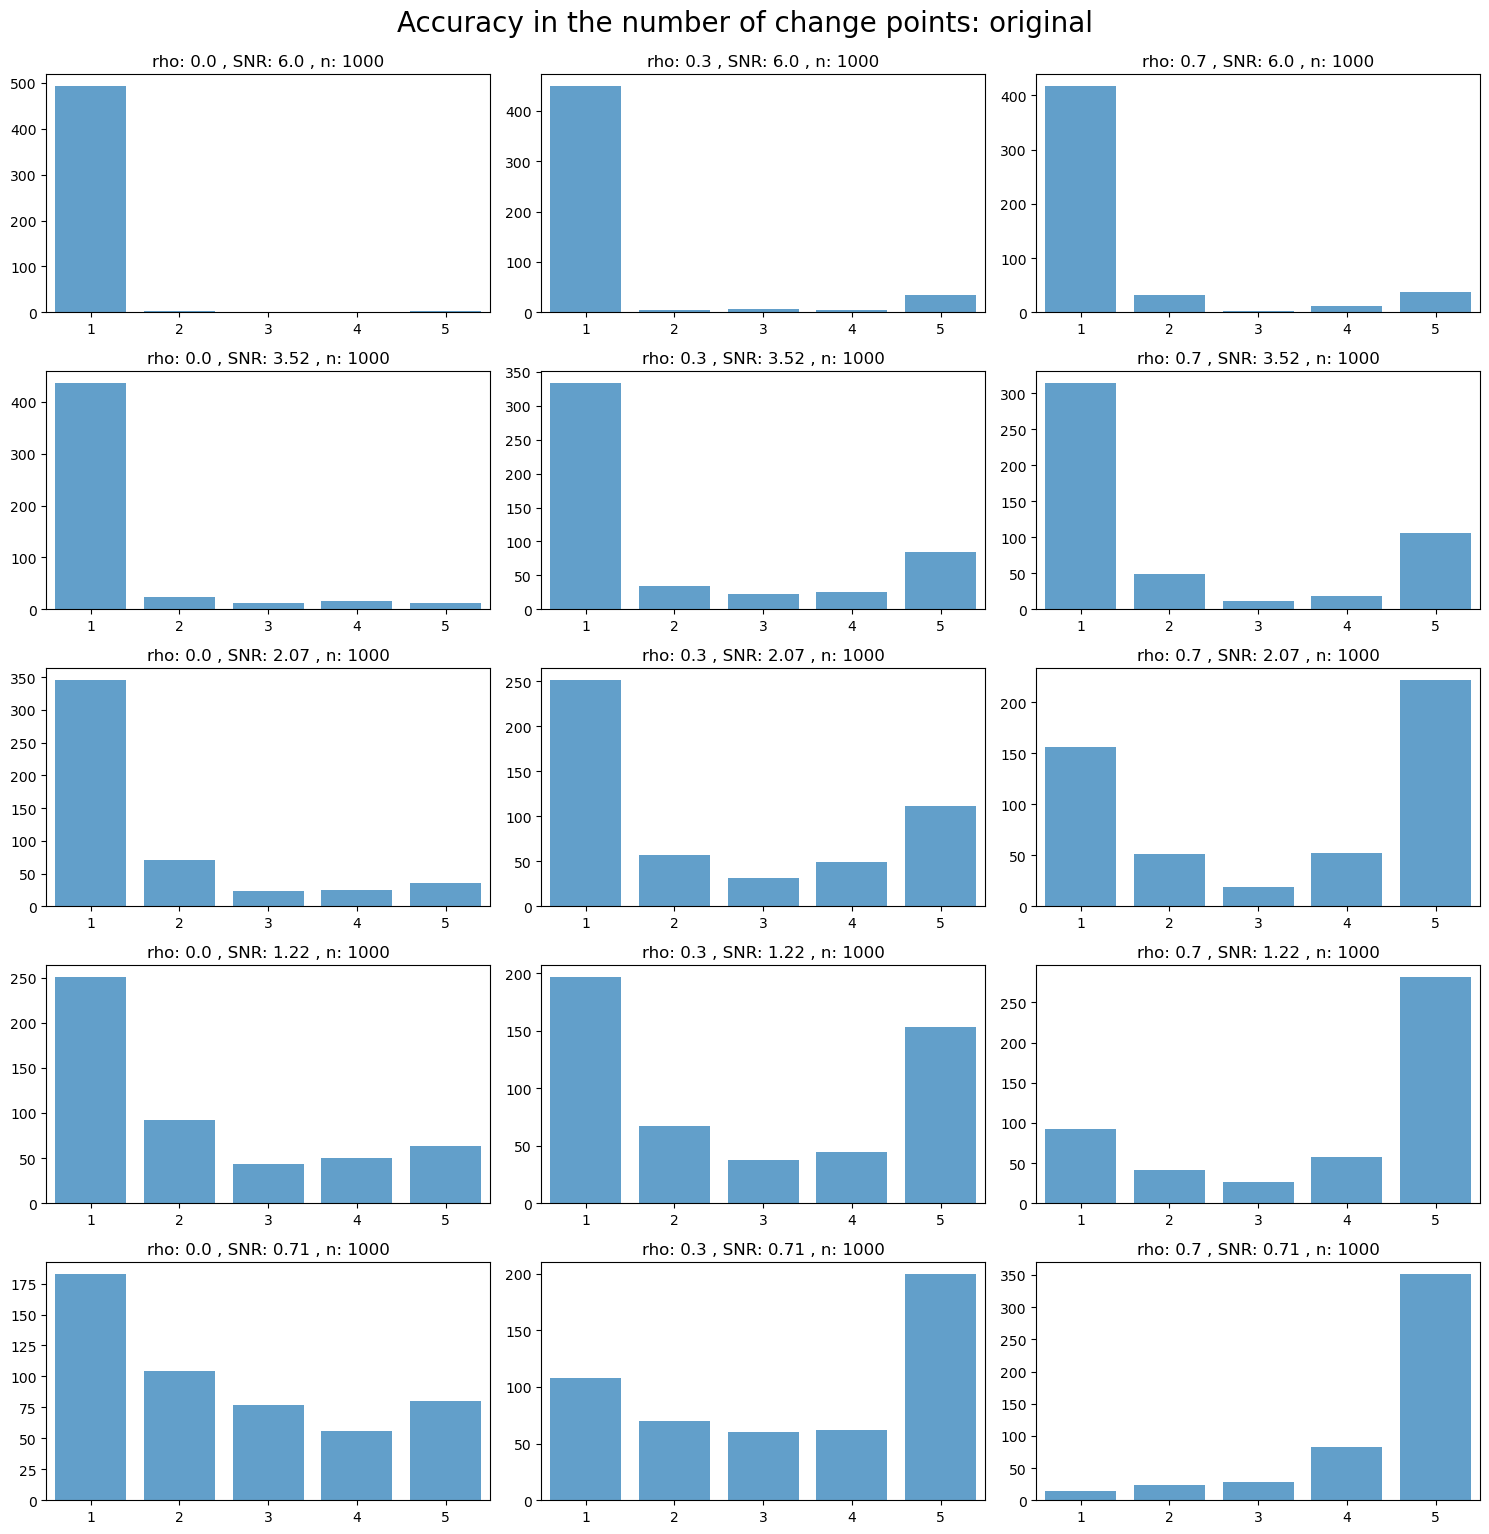

In [8]:
number_cps_plot(df, name = "original")

## Optimality Gap

Findings:

- Large optimality gap is associated with the model performance.

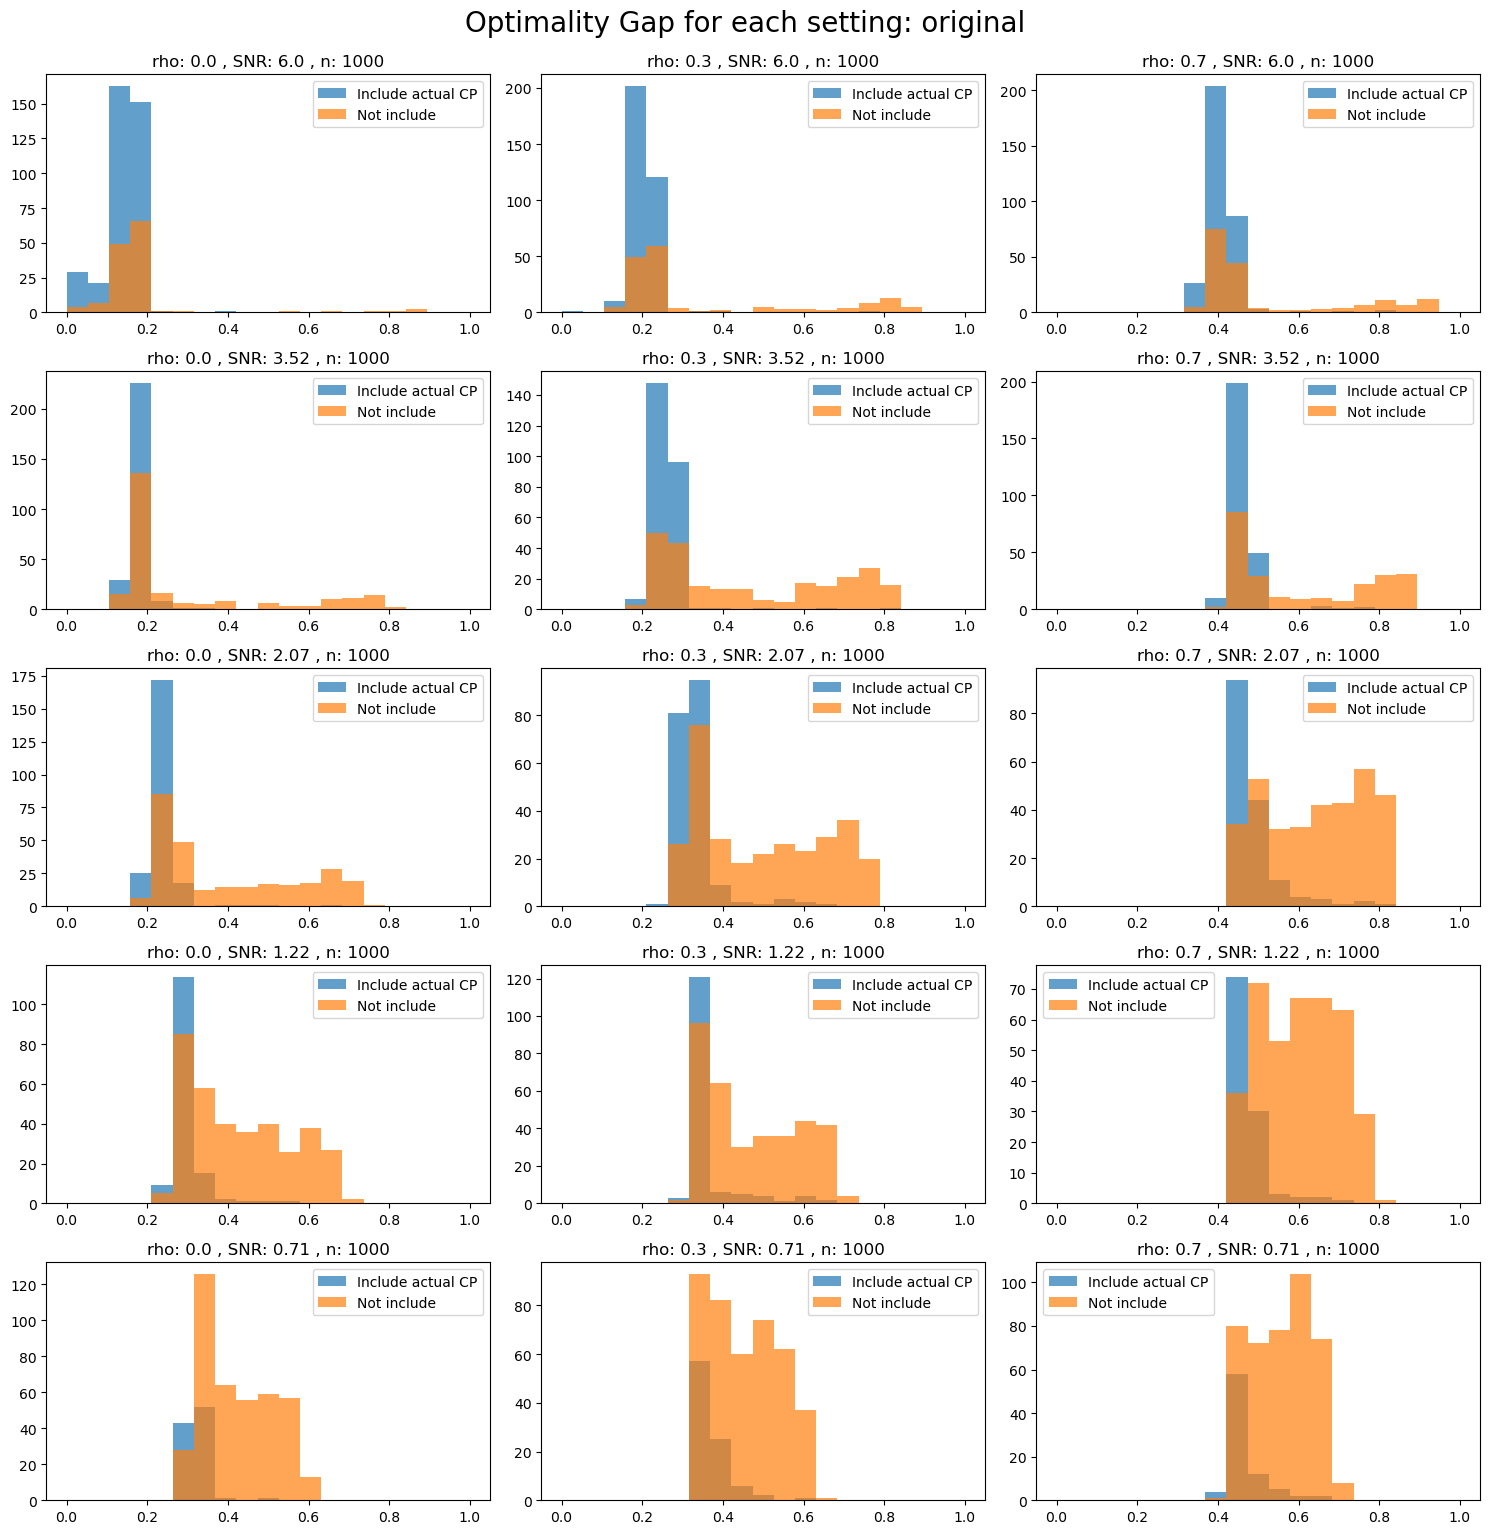

In [9]:
opt_gap_plot(df, name = "original")

# Our proposed method with quadratic penalty term

- we assume quadratic form in penalty term

In [11]:
df_quad = pd.read_csv('results/simulation_five_variate_quadratic_penalty_original_20230428.csv')
#df_quad = df_processing(df_quad)
df_quad

,Unnamed: 0
0,NaN


## Accuracy

Findings:


In [11]:
df_count_quad = accuracy_table(df_quad)
df_count_quad

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,15,15,0.30,0.30
1,0.0,1.22,1000,20,20,0.40,0.40
2,0.0,2.07,1000,27,28,0.54,0.56
3,0.0,3.52,1000,36,36,0.72,0.72
4,0.0,6.00,1000,37,37,0.74,0.74
5,0.3,0.71,1000,9,10,0.18,0.20
6,0.3,1.22,1000,12,14,0.24,0.28
7,0.3,2.07,1000,25,29,0.50,0.58
8,0.3,3.52,1000,26,27,0.52,0.54
9,0.3,6.00,1000,35,35,0.70,0.70


In [12]:
accuracy_table(df_quad, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,37,37,0.74,0.74
3,0.0,3.52,1000,36,36,0.72,0.72
9,0.3,6.00,1000,35,35,0.70,0.70
14,0.7,6.00,1000,35,35,0.70,0.70
7,0.3,2.07,1000,25,29,0.50,0.58
2,0.0,2.07,1000,27,28,0.54,0.56
8,0.3,3.52,1000,26,27,0.52,0.54
1,0.0,1.22,1000,20,20,0.40,0.40
12,0.7,2.07,1000,17,18,0.34,0.36
13,0.7,3.52,1000,17,17,0.34,0.34


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

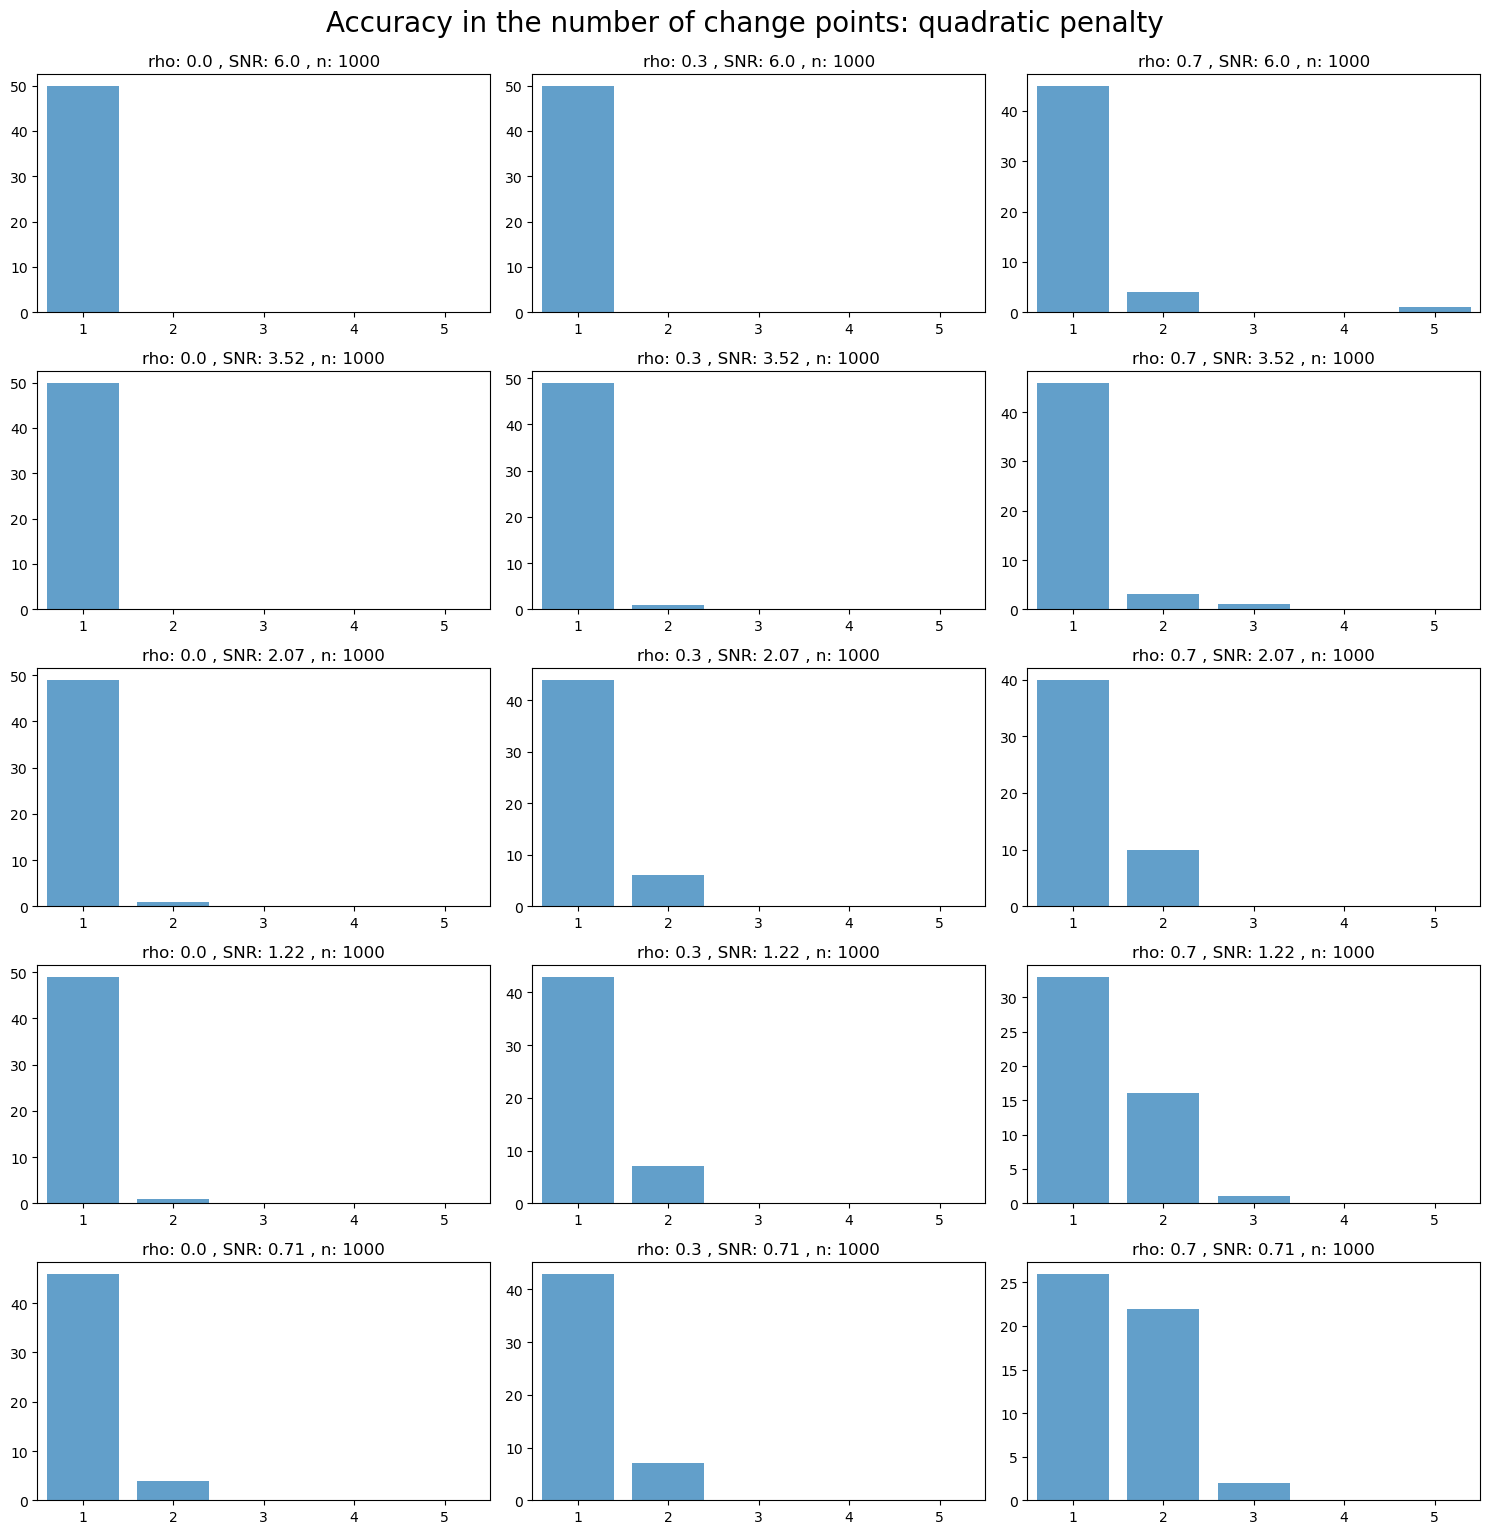

In [13]:
number_cps_plot(df_quad , name = "quadratic penalty")

## Optimality Gap

Findings:

- Similar

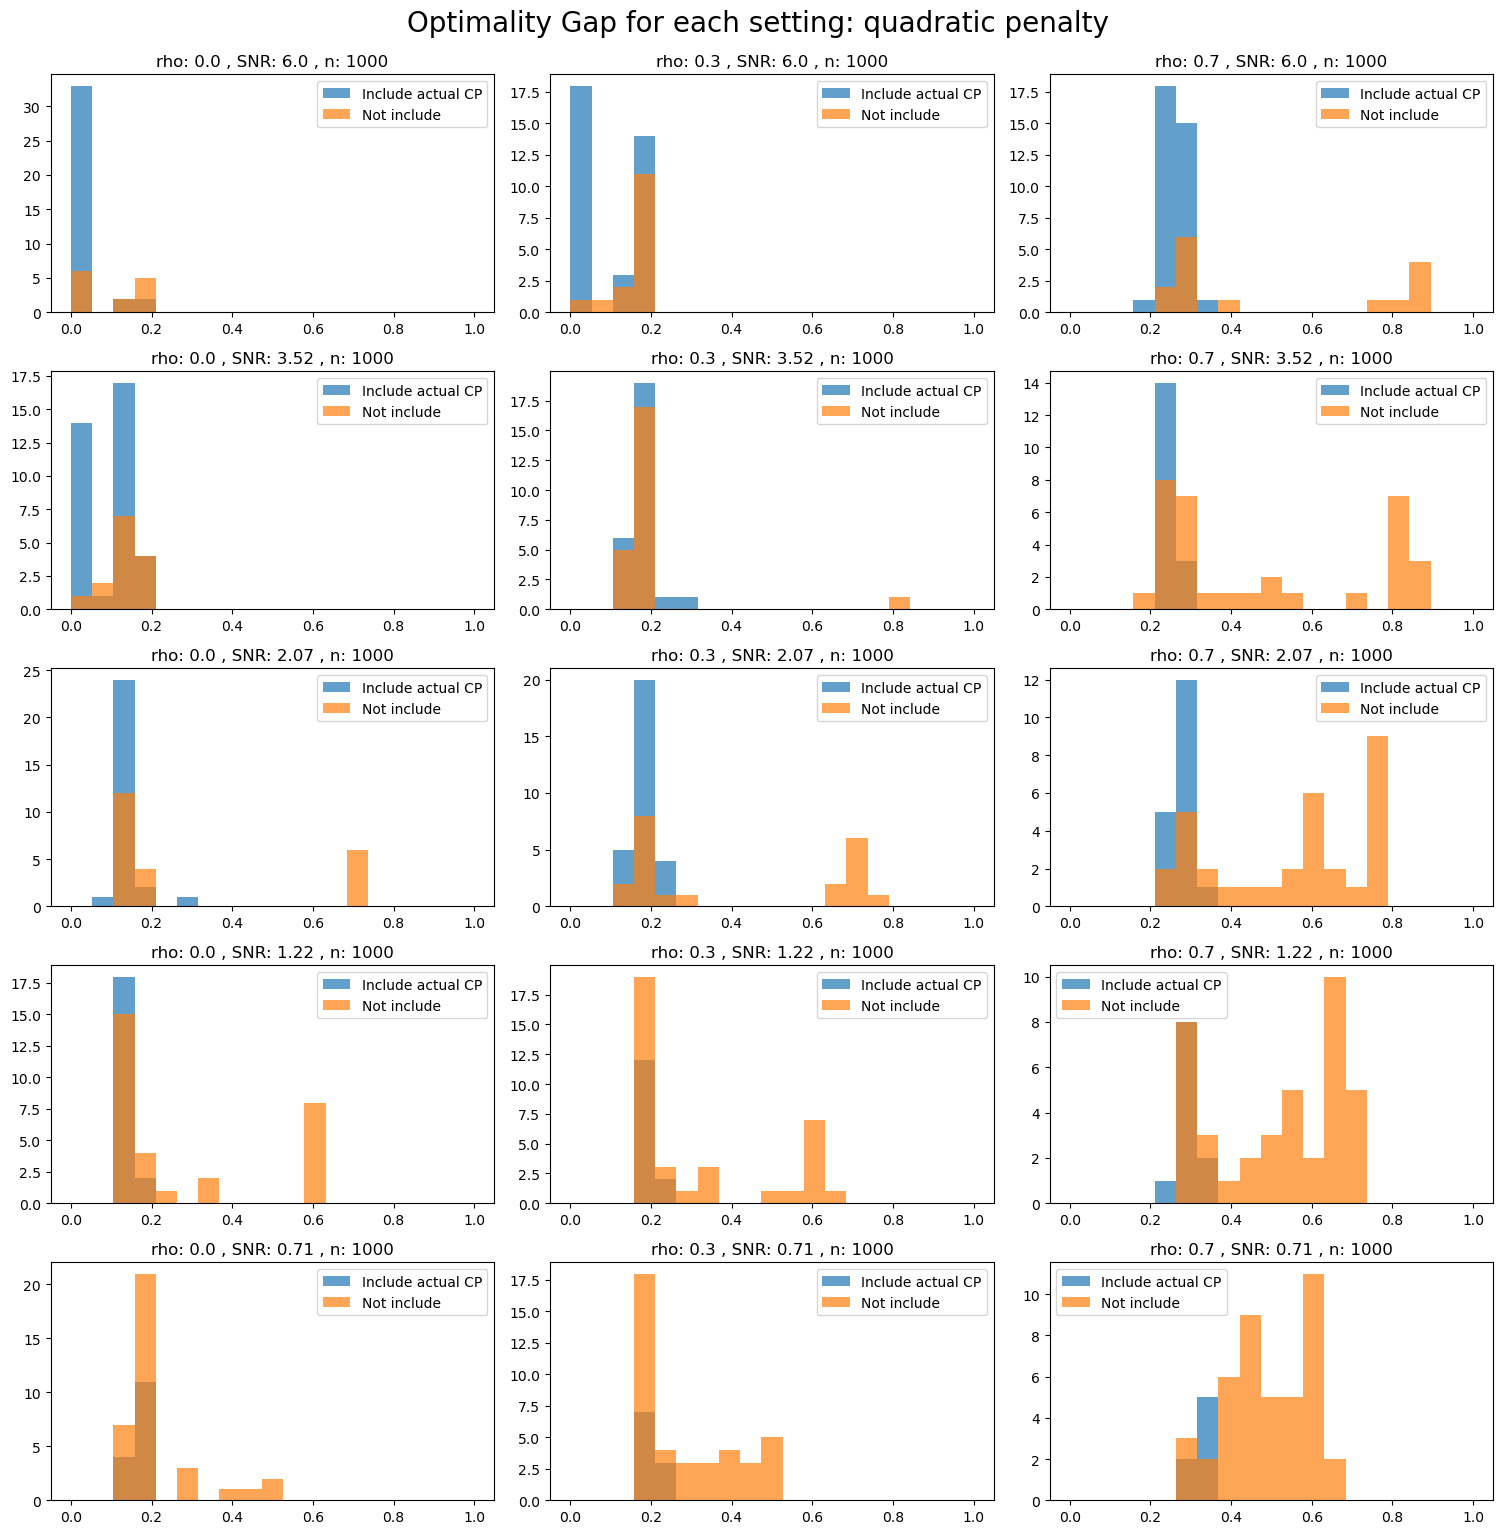

In [14]:
opt_gap_plot(df_quad , name = "quadratic penalty")

# Our proposed method with squared big M constraint

- we assume quadratic form in big M constraint
- 50 times for each simulation setting 

In [15]:
df_sqM = pd.read_csv('results/temp/simulation_five_variate_squared_bigM_20230419.csv')
df_sqM = df_processing(df_sqM)
df_sqM

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,3,472.193881,0.0,6.00,1000,0.422247,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,6,472.702832,0.0,6.00,1000,0.374203,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,4,473.158717,0.0,6.00,1000,0.409374,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,5,473.275011,0.0,6.00,1000,0.344461,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,1,473.440935,0.0,6.00,1000,0.336261,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,48,434.155643,0.0,0.71,1000,0.168689,[498],False,0,1,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,49,428.354749,0.3,0.71,1000,0.165240,[500],False,0,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,48,432.430141,0.3,0.71,1000,0.141663,[503],False,0,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,49,430.665516,0.7,0.71,1000,0.164001,"[500, 722]",False,0,2,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [16]:
df_count_sqM = accuracy_table(df_sqM)
df_count_sqM

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,1,4,0.02,0.08
1,0.0,1.22,1000,15,18,0.30,0.36
2,0.0,2.07,1000,27,27,0.54,0.54
3,0.0,3.52,1000,31,31,0.62,0.62
4,0.0,6.00,1000,35,35,0.70,0.70
5,0.3,0.71,1000,2,5,0.04,0.10
6,0.3,1.22,1000,11,18,0.22,0.36
7,0.3,2.07,1000,21,27,0.42,0.54
8,0.3,3.52,1000,37,37,0.74,0.74
9,0.3,6.00,1000,41,41,0.82,0.82


In [17]:
accuracy_table(df_sqM, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
9,0.3,6.00,1000,41,41,0.82,0.82
8,0.3,3.52,1000,37,37,0.74,0.74
4,0.0,6.00,1000,35,35,0.70,0.70
3,0.0,3.52,1000,31,31,0.62,0.62
14,0.7,6.00,1000,30,31,0.60,0.62
2,0.0,2.07,1000,27,27,0.54,0.54
7,0.3,2.07,1000,21,27,0.42,0.54
13,0.7,3.52,1000,8,20,0.16,0.40
1,0.0,1.22,1000,15,18,0.30,0.36
6,0.3,1.22,1000,11,18,0.22,0.36


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

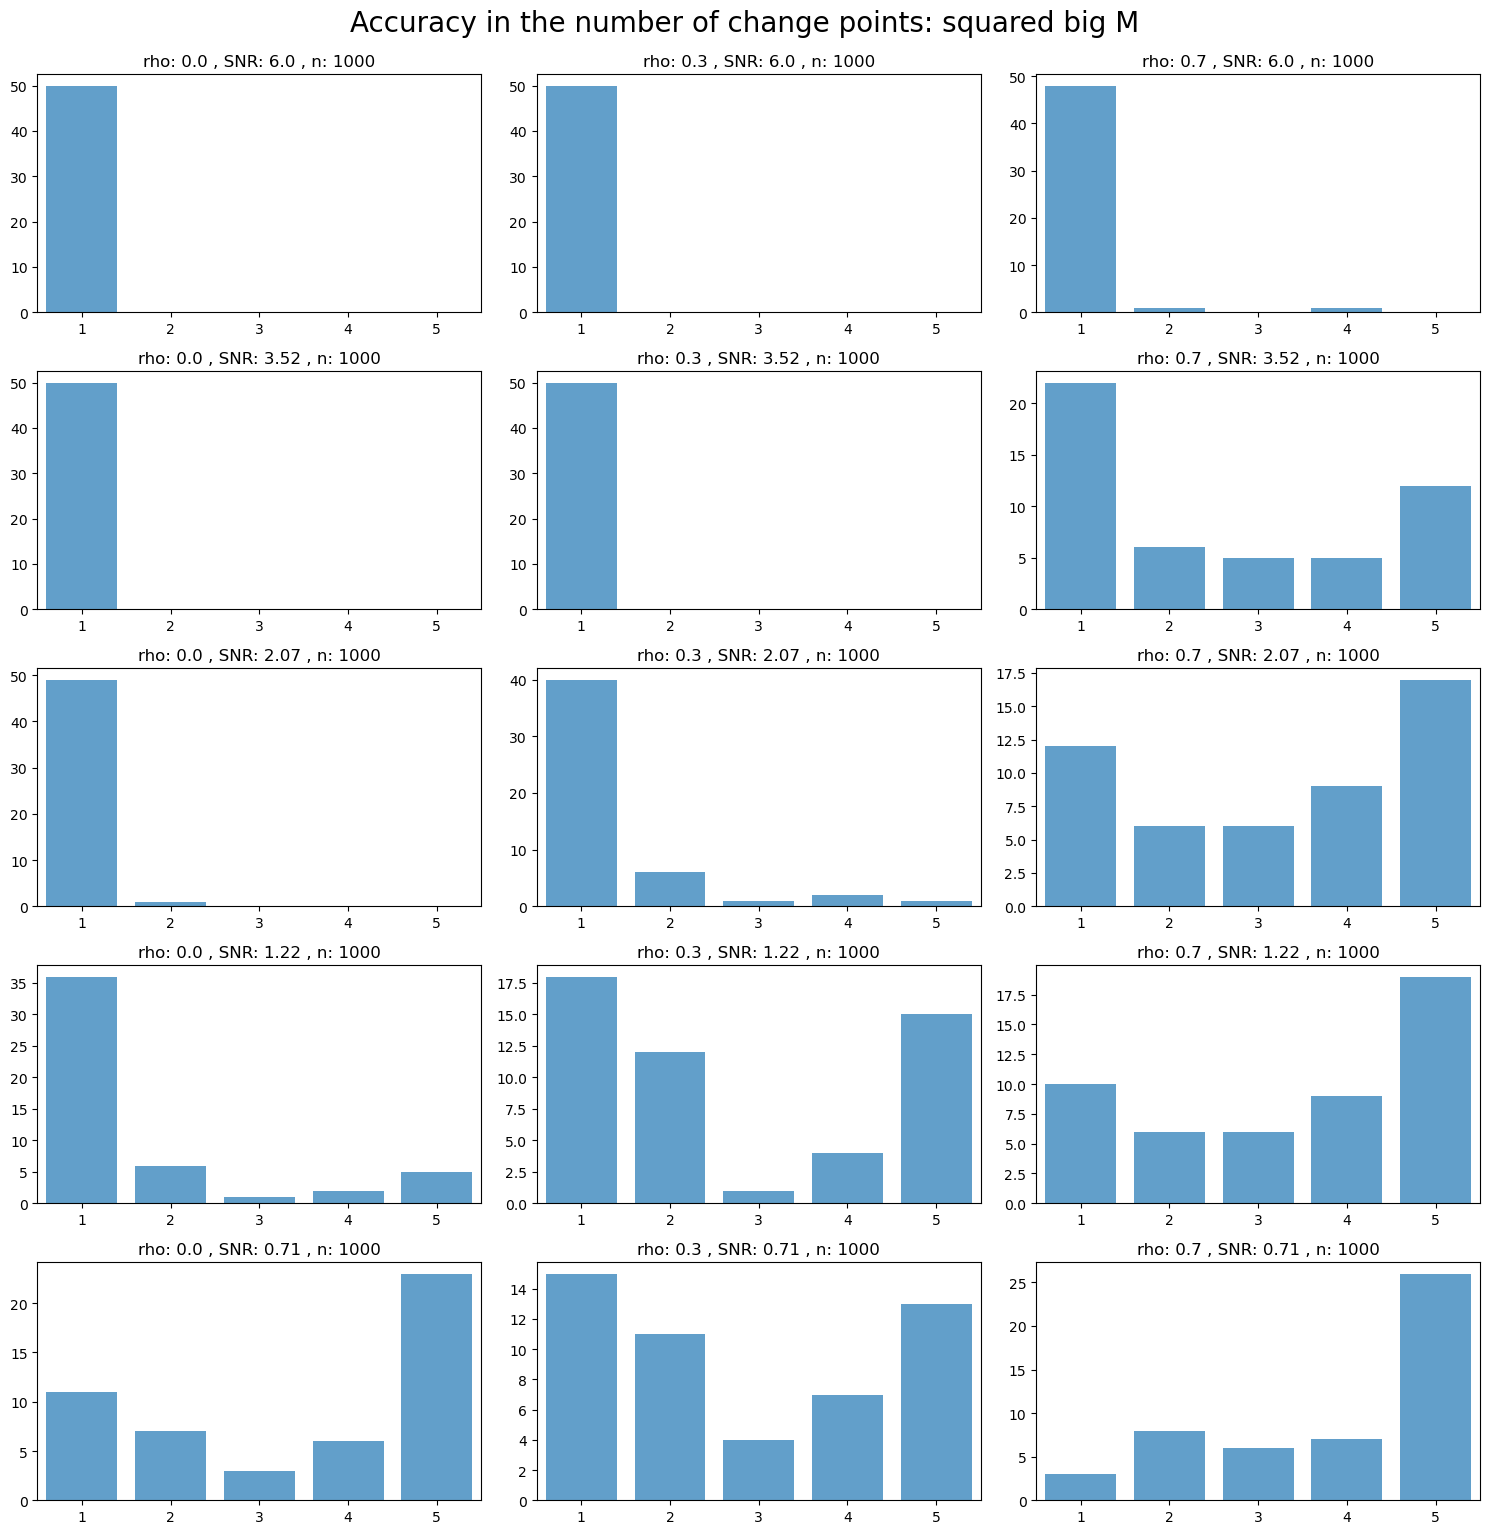

In [18]:
number_cps_plot(df_sqM, name = "squared big M")

## Optimality Gap

Findings:

- Similar

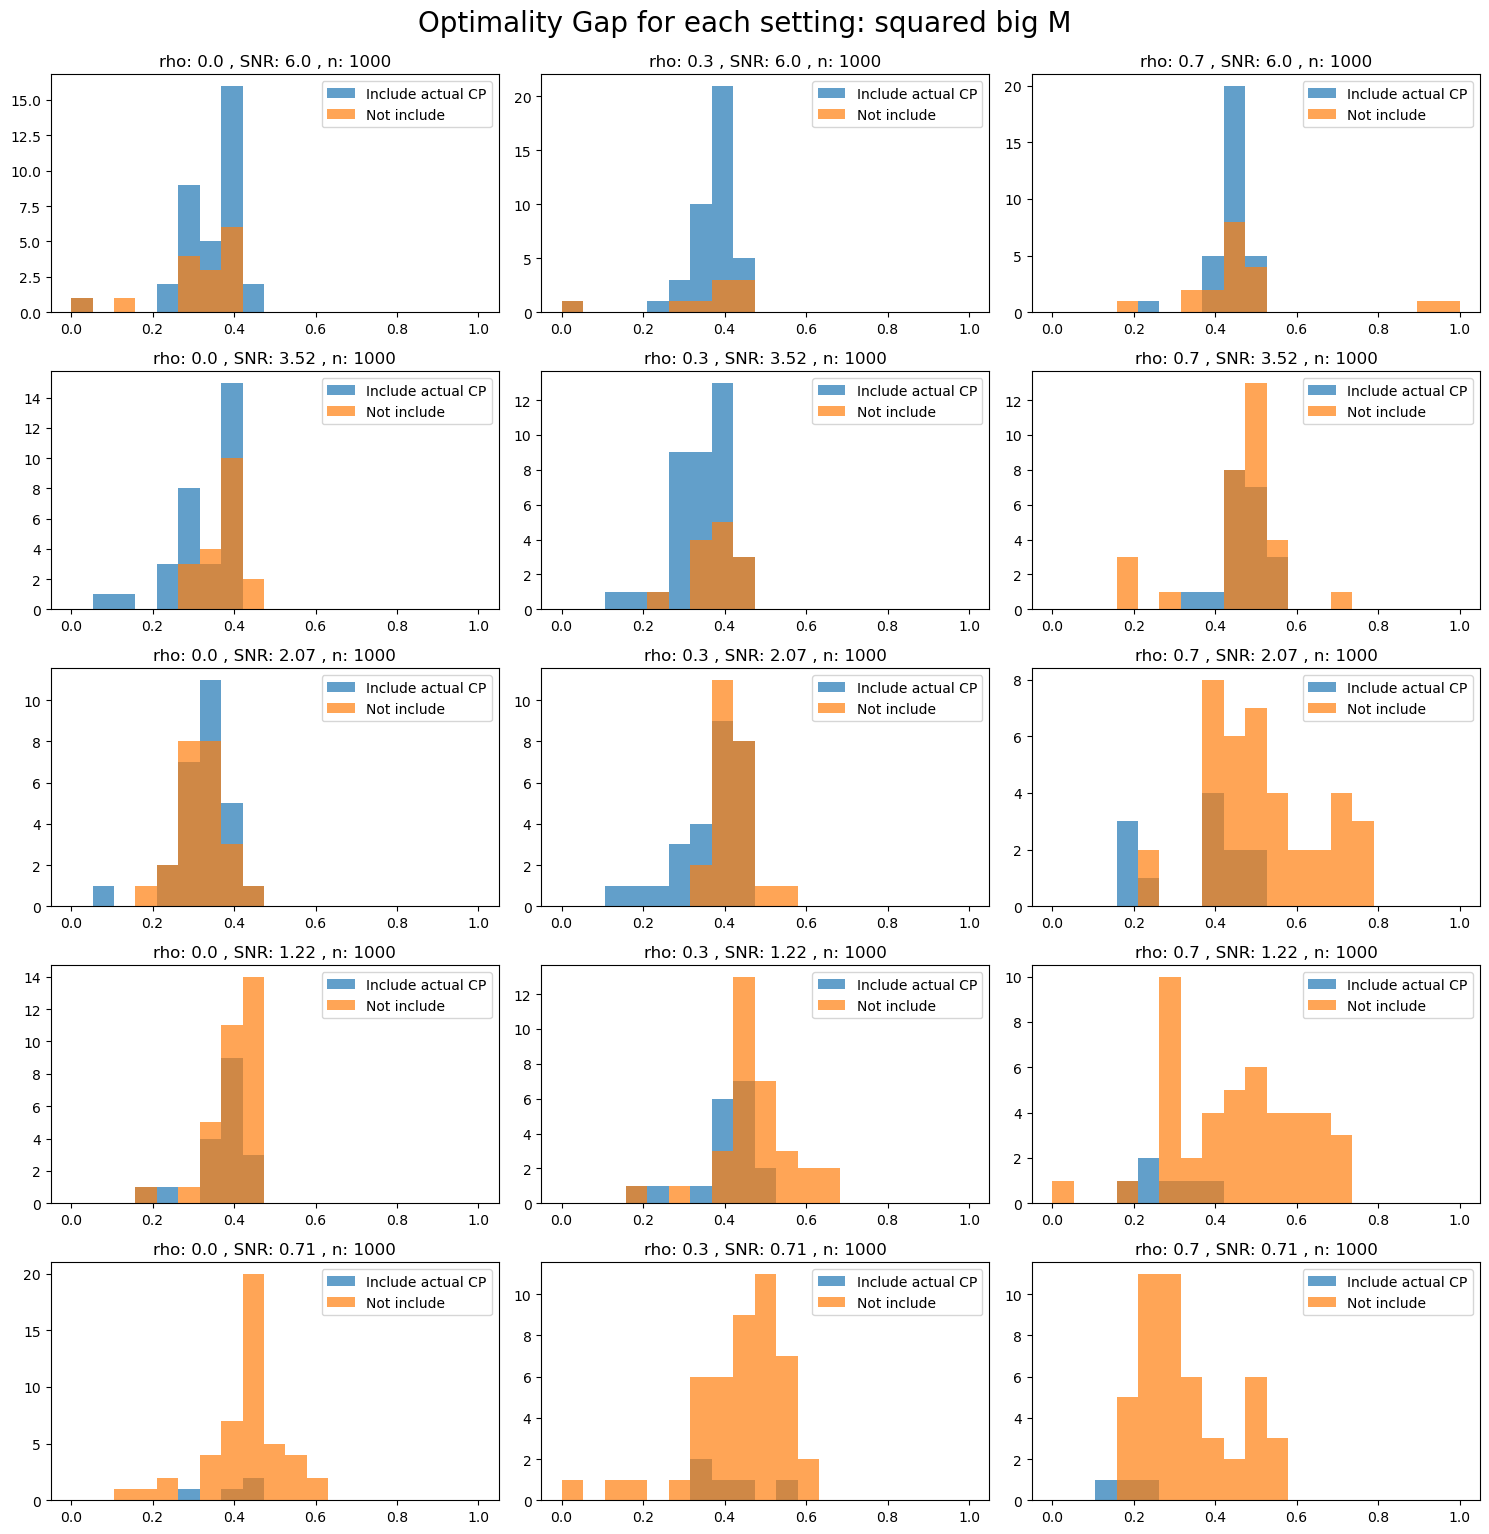

In [19]:
opt_gap_plot(df_sqM, name = "squared big M")

# Our proposed method with l2 regularization

- we add l2 regularization in the formulation
- the $\lambda$ is $0.001\times n = 1$
- 50 times for each simulation setting 

In [20]:
df_l2 = pd.read_csv('results/temp/simulation_five_variate_l2_reg_20230421.csv')
df_l2 = df_processing(df_l2)
df_l2

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,459.733326,0.0,6.00,1000,0.112172,[500],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,6,459.676474,0.0,6.00,1000,0.110236,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,2,459.977261,0.0,6.00,1000,0.096186,[495],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,7,459.999672,0.0,6.00,1000,0.181056,[545],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,1,460.305329,0.0,6.00,1000,0.143012,[480],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,48,429.652070,0.0,0.71,1000,0.182851,[500],False,0,1,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,49,436.265371,0.3,0.71,1000,0.202128,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,48,436.379814,0.3,0.71,1000,0.215944,"[415, 498]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,49,428.784983,0.7,0.71,1000,0.276917,"[493, 501, 705]",False,0,3,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [21]:
df_count_l2 = accuracy_table(df_l2)
df_count_l2

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,7,8,0.14,0.16
1,0.0,1.22,1000,7,8,0.14,0.16
2,0.0,2.07,1000,6,10,0.12,0.20
3,0.0,3.52,1000,16,16,0.32,0.32
4,0.0,6.00,1000,17,17,0.34,0.34
5,0.3,0.71,1000,4,9,0.08,0.18
6,0.3,1.22,1000,4,4,0.08,0.08
7,0.3,2.07,1000,14,16,0.28,0.32
8,0.3,3.52,1000,18,24,0.36,0.48
9,0.3,6.00,1000,21,25,0.42,0.50


In [22]:
accuracy_table(df_l2, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
9,0.3,6.00,1000,21,25,0.42,0.50
14,0.7,6.00,1000,23,25,0.46,0.50
8,0.3,3.52,1000,18,24,0.36,0.48
4,0.0,6.00,1000,17,17,0.34,0.34
3,0.0,3.52,1000,16,16,0.32,0.32
7,0.3,2.07,1000,14,16,0.28,0.32
13,0.7,3.52,1000,12,15,0.24,0.30
10,0.7,0.71,1000,7,12,0.14,0.24
11,0.7,1.22,1000,6,11,0.12,0.22
2,0.0,2.07,1000,6,10,0.12,0.20


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

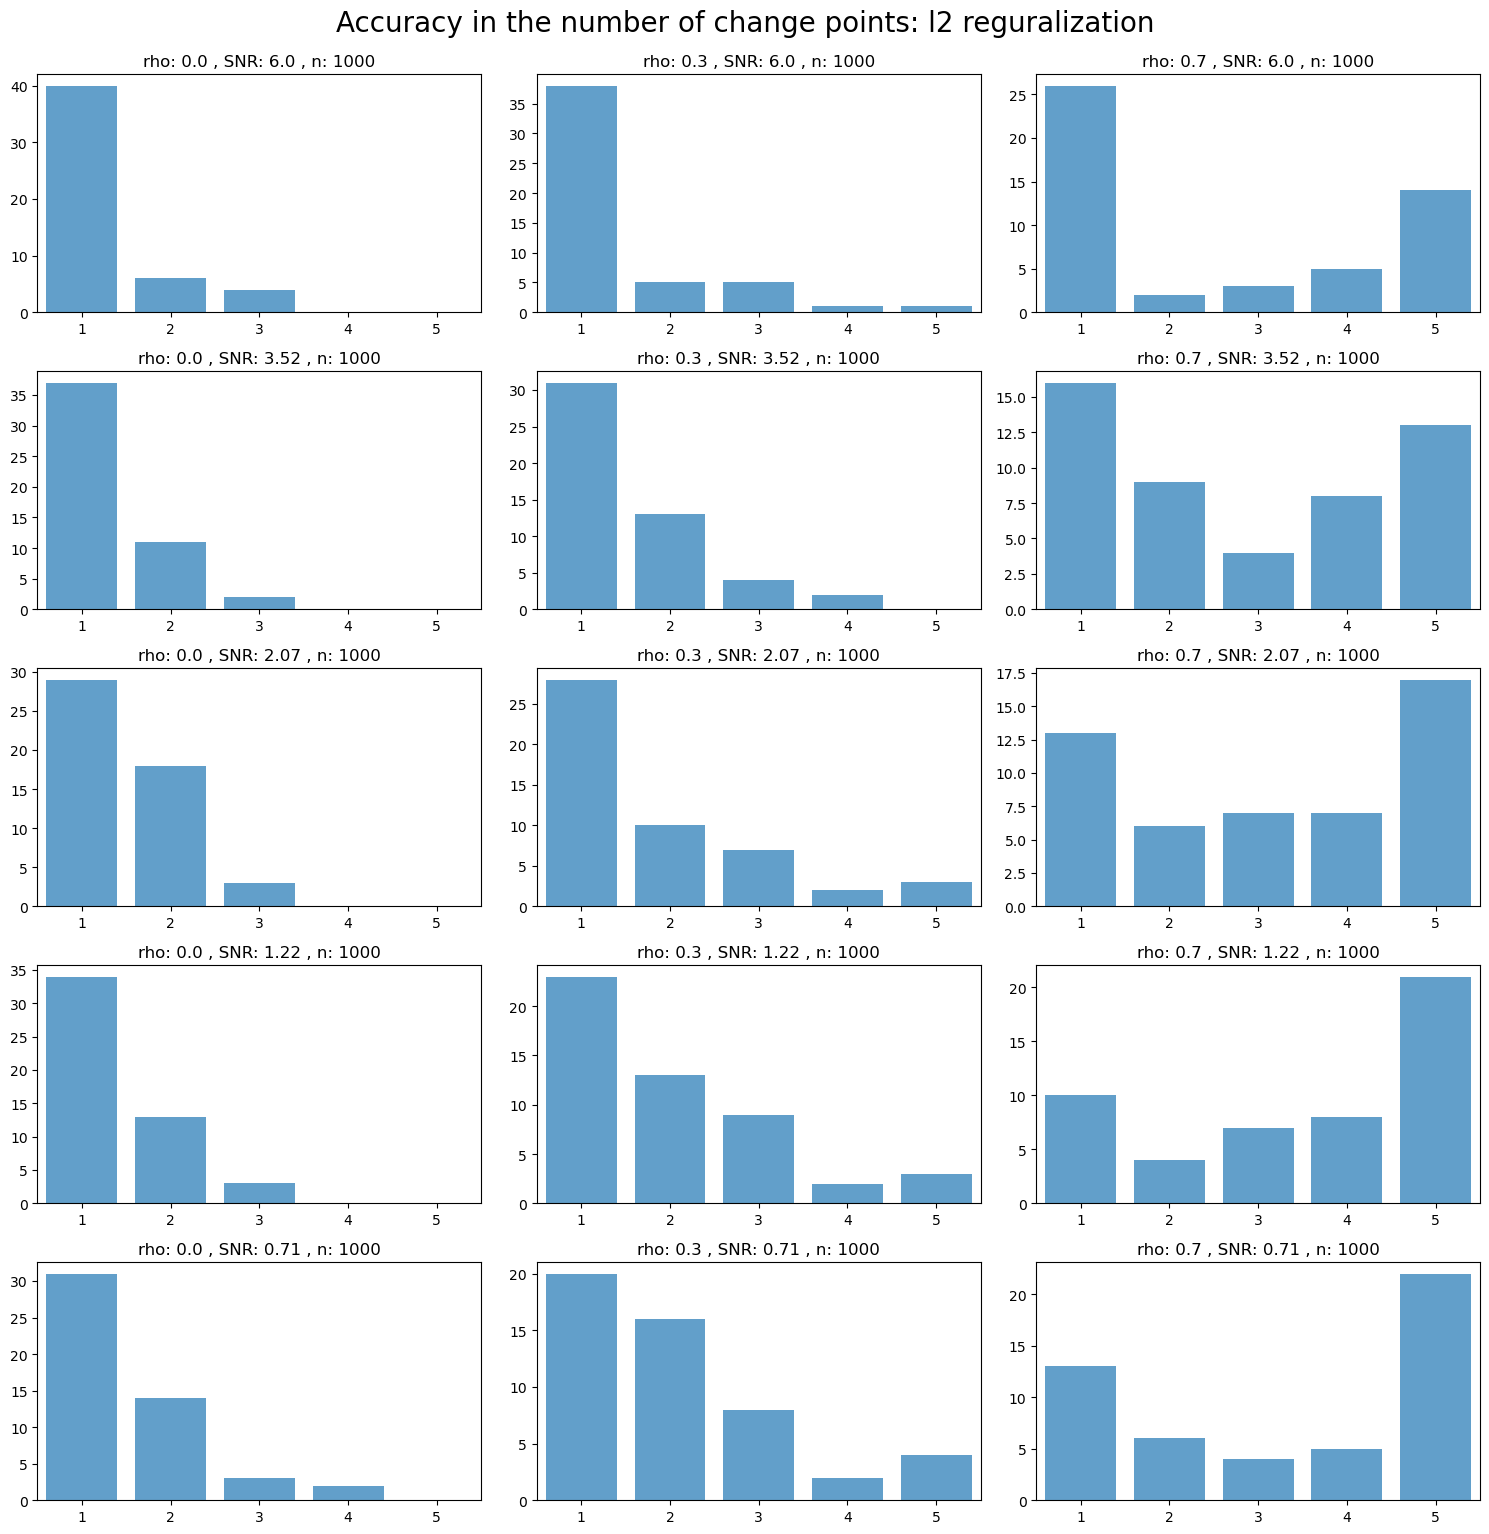

In [23]:
number_cps_plot(df_l2, name = "l2 reguralization")

## Optimality Gap

Findings:

- Similar

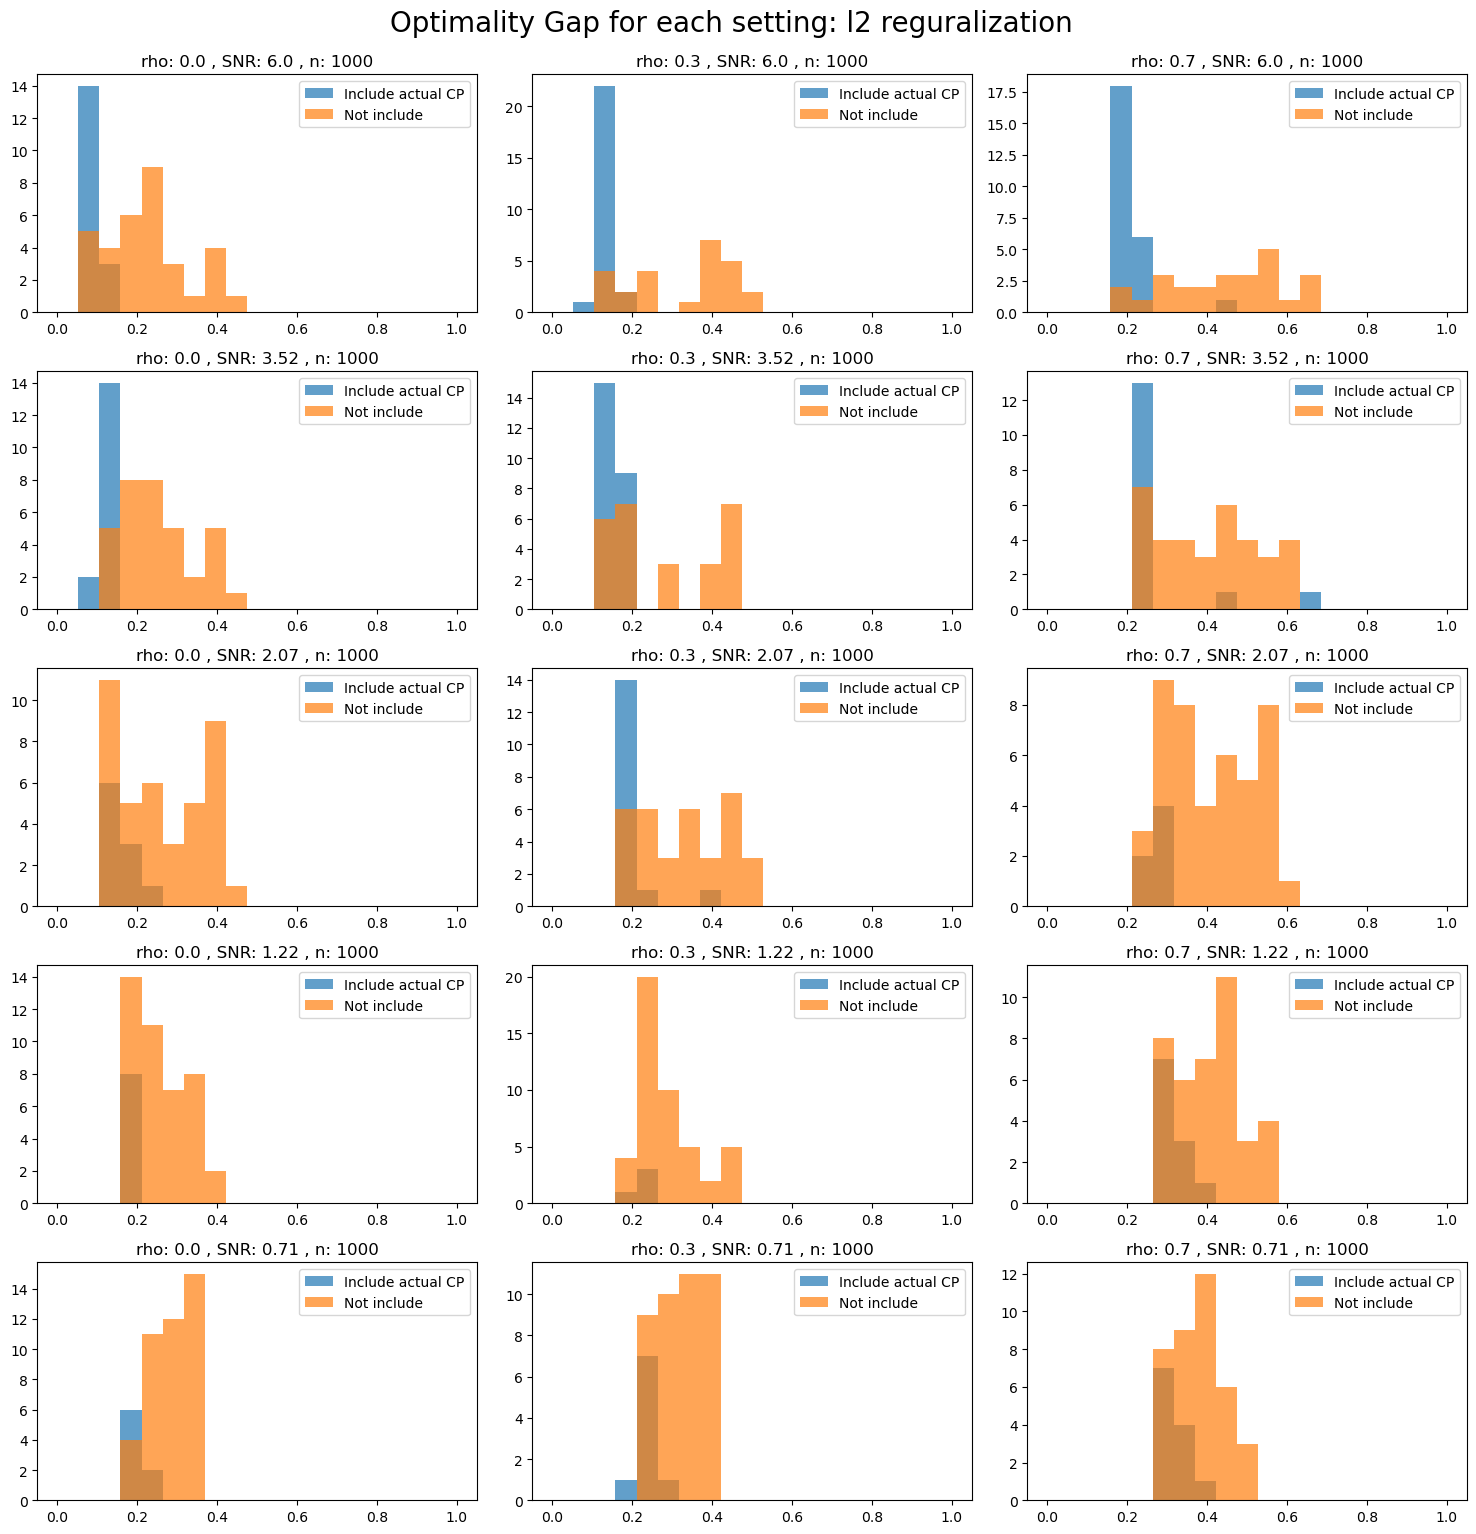

In [24]:
opt_gap_plot(df_l2, name = "l2 reguralization")

# Our proposed method with different l2 regularization

- we add l2 regularization in the formulation
- the $\lambda$ is $0.0001\times n = 0.1$
- 50 times for each simulation setting 

In [25]:
df_l2_01 = pd.read_csv('results/temp/simulation_five_variate_l2_reg_20230422.csv')
df_l2_01 = df_processing(df_l2_01)
df_l2_01

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,400.686301,0.0,6.00,1000,0.000000,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,7,503.523651,0.0,6.00,1000,0.122453,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,3,503.780770,0.0,6.00,1000,0.107313,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,6,503.760477,0.0,6.00,1000,0.115916,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,5,503.784957,0.0,6.00,1000,0.094077,[498],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,48,429.513380,0.0,0.71,1000,0.267963,[508],False,0,1,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,49,429.094555,0.3,0.71,1000,0.275037,[500],False,0,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,48,429.127812,0.3,0.71,1000,0.289535,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,49,429.336923,0.7,0.71,1000,0.377357,"[494, 499, 563, 931, 934]",False,1,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [26]:
df_count_l2_01 = accuracy_table(df_l2_01)
df_count_l2_01

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,11,12,0.22,0.24
1,0.0,1.22,1000,7,9,0.14,0.18
2,0.0,2.07,1000,19,20,0.38,0.40
3,0.0,3.52,1000,30,30,0.60,0.60
4,0.0,6.00,1000,35,35,0.70,0.70
5,0.3,0.71,1000,6,11,0.12,0.22
6,0.3,1.22,1000,10,10,0.20,0.20
7,0.3,2.07,1000,17,20,0.34,0.40
8,0.3,3.52,1000,24,26,0.48,0.52
9,0.3,6.00,1000,39,39,0.78,0.78


In [27]:
accuracy_table(df_l2_01, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
9,0.3,6.00,1000,39,39,0.78,0.78
4,0.0,6.00,1000,35,35,0.70,0.70
3,0.0,3.52,1000,30,30,0.60,0.60
8,0.3,3.52,1000,24,26,0.48,0.52
14,0.7,6.00,1000,24,25,0.48,0.50
2,0.0,2.07,1000,19,20,0.38,0.40
7,0.3,2.07,1000,17,20,0.34,0.40
12,0.7,2.07,1000,12,17,0.24,0.34
13,0.7,3.52,1000,13,17,0.26,0.34
11,0.7,1.22,1000,8,14,0.16,0.28


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

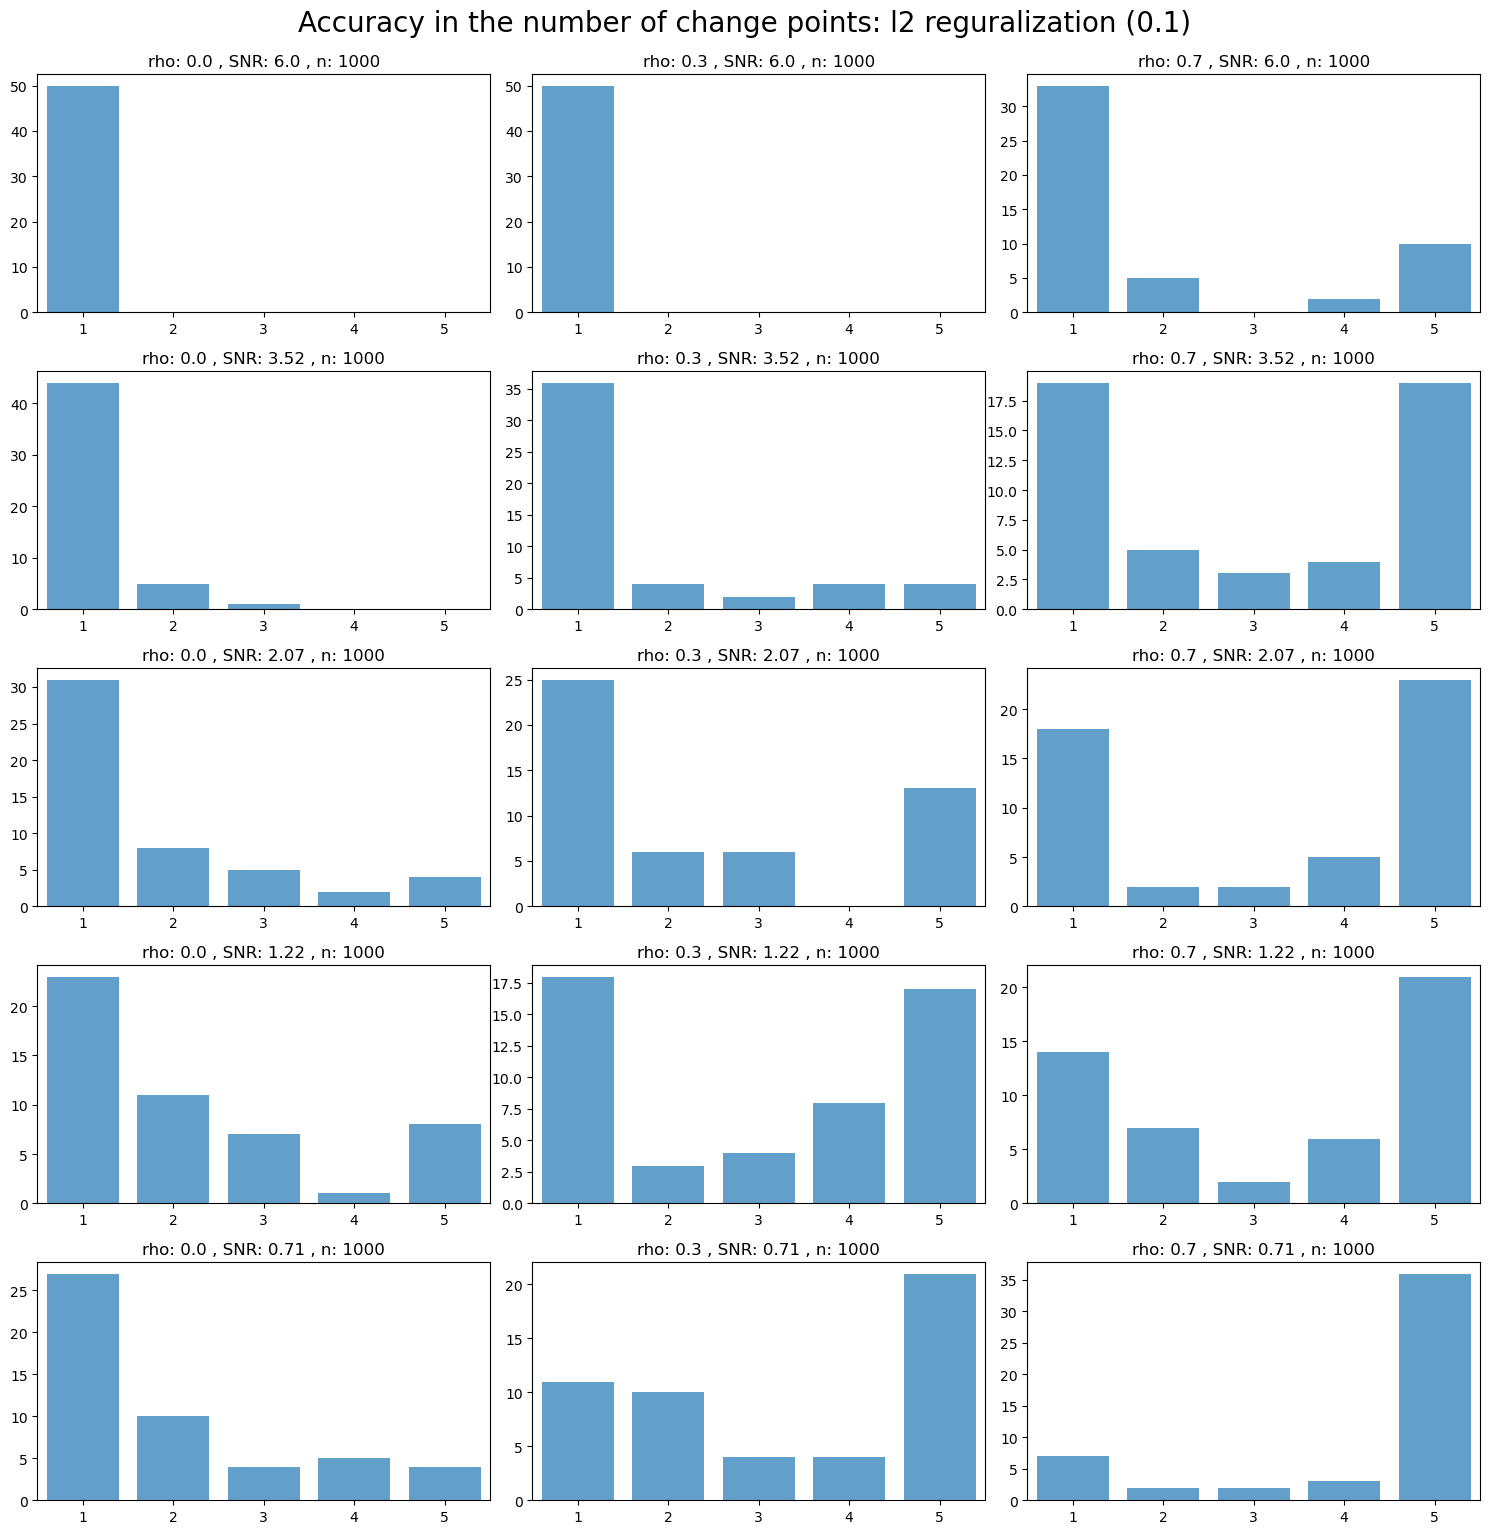

In [28]:
number_cps_plot(df_l2_01, name = "l2 reguralization (0.1)")

# Our proposed method with different l2 regularization

- we add l2 regularization in the formulation
- the $\lambda$ is $0.0005\times n = 0.5$
- 50 times for each simulation setting 

In [29]:
df_l2_05 = pd.read_csv('results/temp/simulation_five_variate_l2_reg_20230423.csv')
df_l2_05 = df_processing(df_l2_05)
df_l2_05

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,1,456.995286,0.0,6.00,1000,0.091013,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,2,456.991474,0.0,6.00,1000,0.093421,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,4,457.104841,0.0,6.00,1000,0.091493,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,0,457.254186,0.0,6.00,1000,0.056869,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,5,457.309309,0.0,6.00,1000,0.575220,"[121, 944]",False,0,2,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,49,426.526505,0.0,0.71,1000,0.205725,[498],False,0,1,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,48,425.810229,0.3,0.71,1000,0.253567,"[430, 482, 709]",False,0,3,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,49,425.853612,0.3,0.71,1000,0.222625,[499],True,1,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,48,426.189379,0.7,0.71,1000,0.310023,"[487, 500, 959, 962]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [30]:
df_count_l2_05 = accuracy_table(df_l2_05)
df_count_l2_05

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,8,10,0.16,0.20
1,0.0,1.22,1000,8,9,0.16,0.18
2,0.0,2.07,1000,17,19,0.34,0.38
3,0.0,3.52,1000,23,23,0.46,0.46
4,0.0,6.00,1000,33,33,0.66,0.66
5,0.3,0.71,1000,6,7,0.12,0.14
6,0.3,1.22,1000,7,8,0.14,0.16
7,0.3,2.07,1000,12,14,0.24,0.28
8,0.3,3.52,1000,25,27,0.50,0.54
9,0.3,6.00,1000,25,26,0.50,0.52


In [31]:
accuracy_table(df_l2_05, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,33,33,0.66,0.66
14,0.7,6.00,1000,29,31,0.58,0.62
8,0.3,3.52,1000,25,27,0.50,0.54
9,0.3,6.00,1000,25,26,0.50,0.52
3,0.0,3.52,1000,23,23,0.46,0.46
2,0.0,2.07,1000,17,19,0.34,0.38
12,0.7,2.07,1000,14,19,0.28,0.38
13,0.7,3.52,1000,14,19,0.28,0.38
7,0.3,2.07,1000,12,14,0.24,0.28
11,0.7,1.22,1000,11,14,0.22,0.28


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

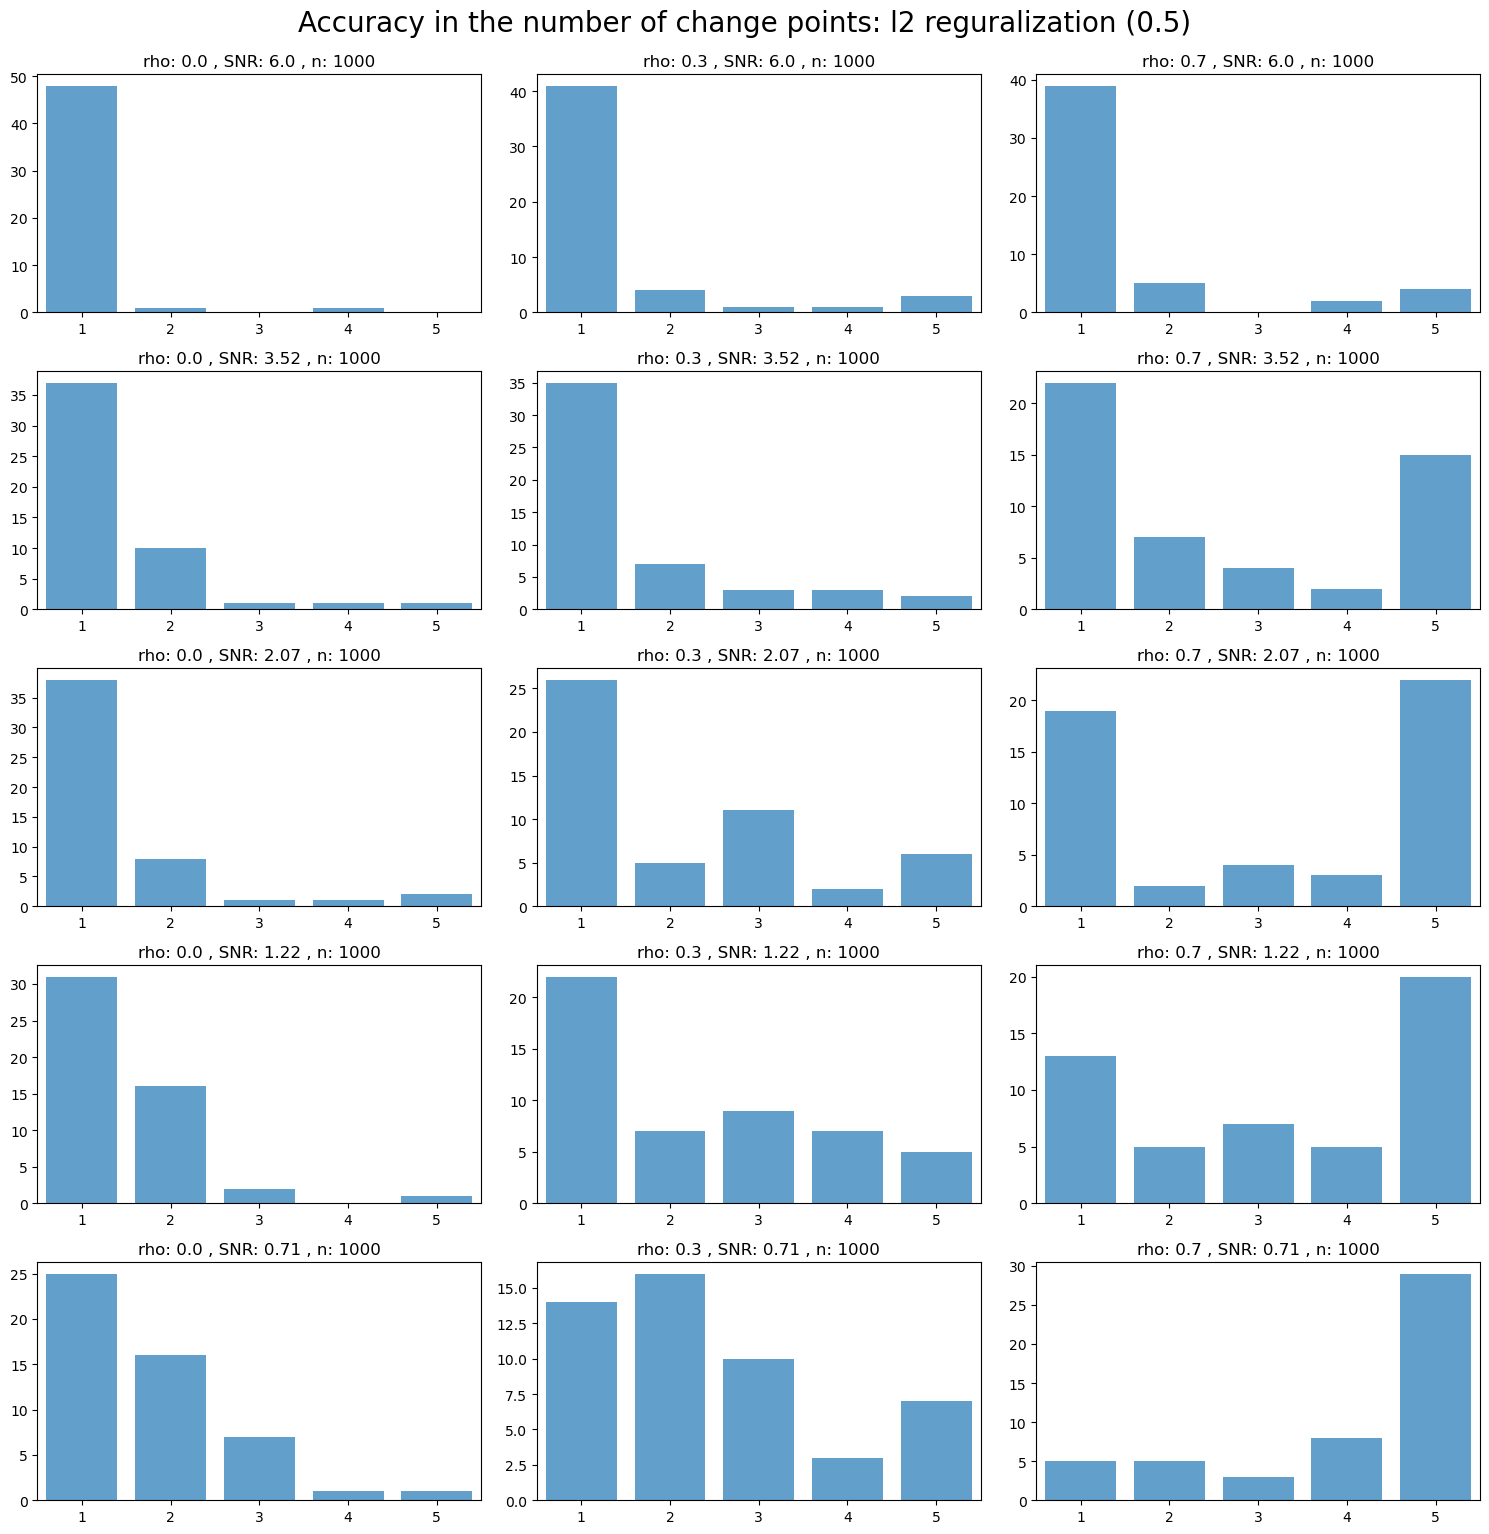

In [32]:
number_cps_plot(df_l2_05, name = "l2 reguralization (0.5)")

## Optimality Gap

Findings:

- Similar

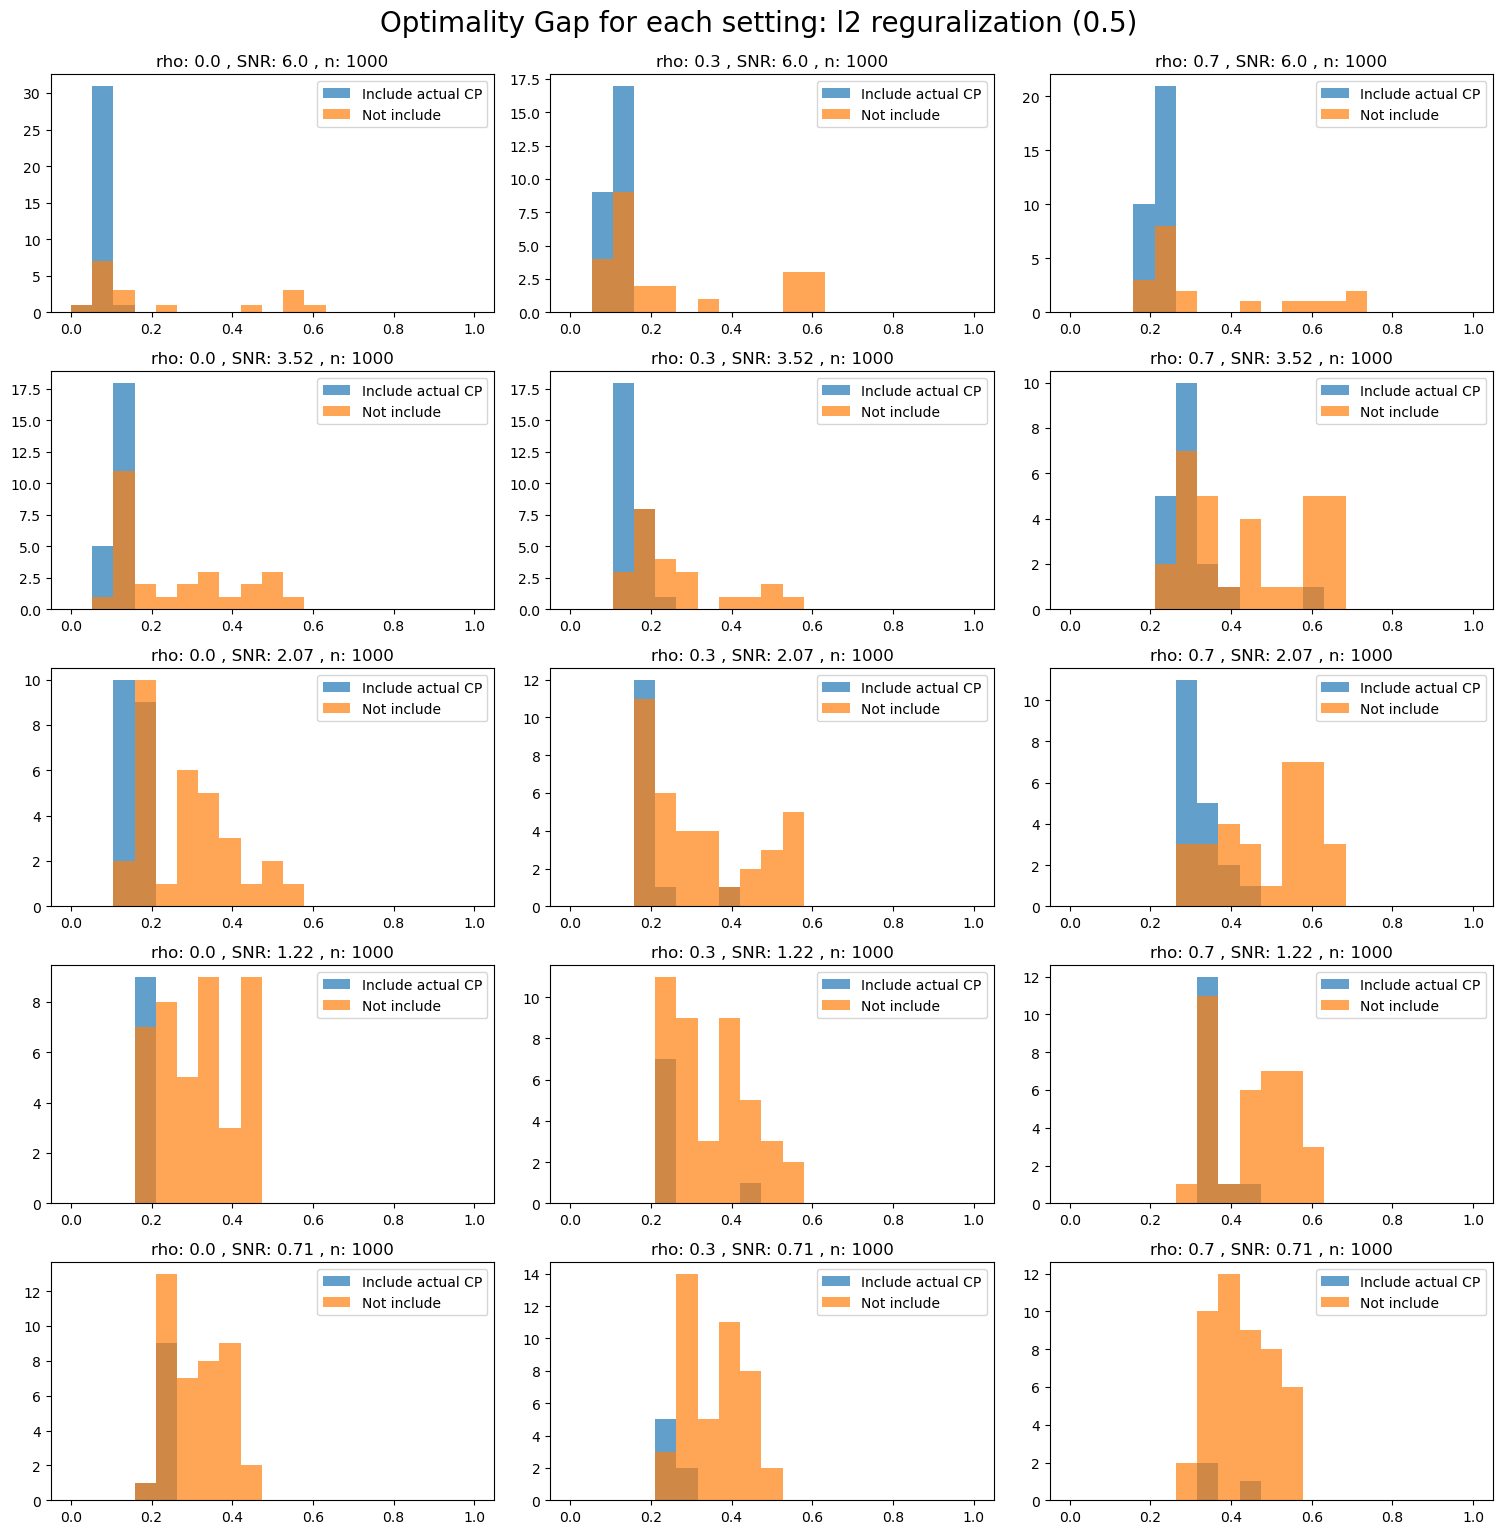

In [33]:
opt_gap_plot(df_l2_05, name = "l2 reguralization (0.5)")

# Our proposed method with l1 regularization

- we add l1 regularization in the formulation
- the $\lambda$ is $0.001\times n = 1$
- 50 times for each simulation setting 

In [34]:
df_l1 = pd.read_csv('results/temp/simulation_five_variate_l1_reg_20230424.csv')
df_l1 = df_processing(df_l1)
df_l1

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,0,464.241743,0.0,6.00,1000,0.130261,[507],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,1,464.199208,0.0,6.00,1000,0.141808,"[498, 760]",False,0,2,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,4,466.840551,0.0,6.00,1000,0.105798,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,3,467.441405,0.0,6.00,1000,0.113183,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,2,467.683917,0.0,6.00,1000,0.145180,"[375, 499]",False,1,2,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,49,431.565262,0.0,0.71,1000,0.223531,"[439, 443]",False,0,2,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,48,430.812137,0.3,0.71,1000,0.312977,"[132, 629]",False,0,2,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,49,430.819272,0.3,0.71,1000,0.244613,[497],False,0,1,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,48,431.094557,0.7,0.71,1000,0.505657,"[506, 523, 707, 738]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [35]:
df_count_l1 = accuracy_table(df_l1)
df_count_l1

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,2,3,0.04,0.06
1,0.0,1.22,1000,0,1,0.00,0.02
2,0.0,2.07,1000,6,10,0.12,0.20
3,0.0,3.52,1000,7,7,0.14,0.14
4,0.0,6.00,1000,10,11,0.20,0.22
5,0.3,0.71,1000,4,5,0.08,0.10
6,0.3,1.22,1000,5,5,0.10,0.10
7,0.3,2.07,1000,13,14,0.26,0.28
8,0.3,3.52,1000,12,12,0.24,0.24
9,0.3,6.00,1000,14,15,0.28,0.30


In [36]:
accuracy_table(df_l1, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
13,0.7,3.52,1000,15,18,0.30,0.36
9,0.3,6.00,1000,14,15,0.28,0.30
14,0.7,6.00,1000,12,15,0.24,0.30
7,0.3,2.07,1000,13,14,0.26,0.28
8,0.3,3.52,1000,12,12,0.24,0.24
12,0.7,2.07,1000,11,12,0.22,0.24
4,0.0,6.00,1000,10,11,0.20,0.22
2,0.0,2.07,1000,6,10,0.12,0.20
11,0.7,1.22,1000,7,9,0.14,0.18
3,0.0,3.52,1000,7,7,0.14,0.14


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

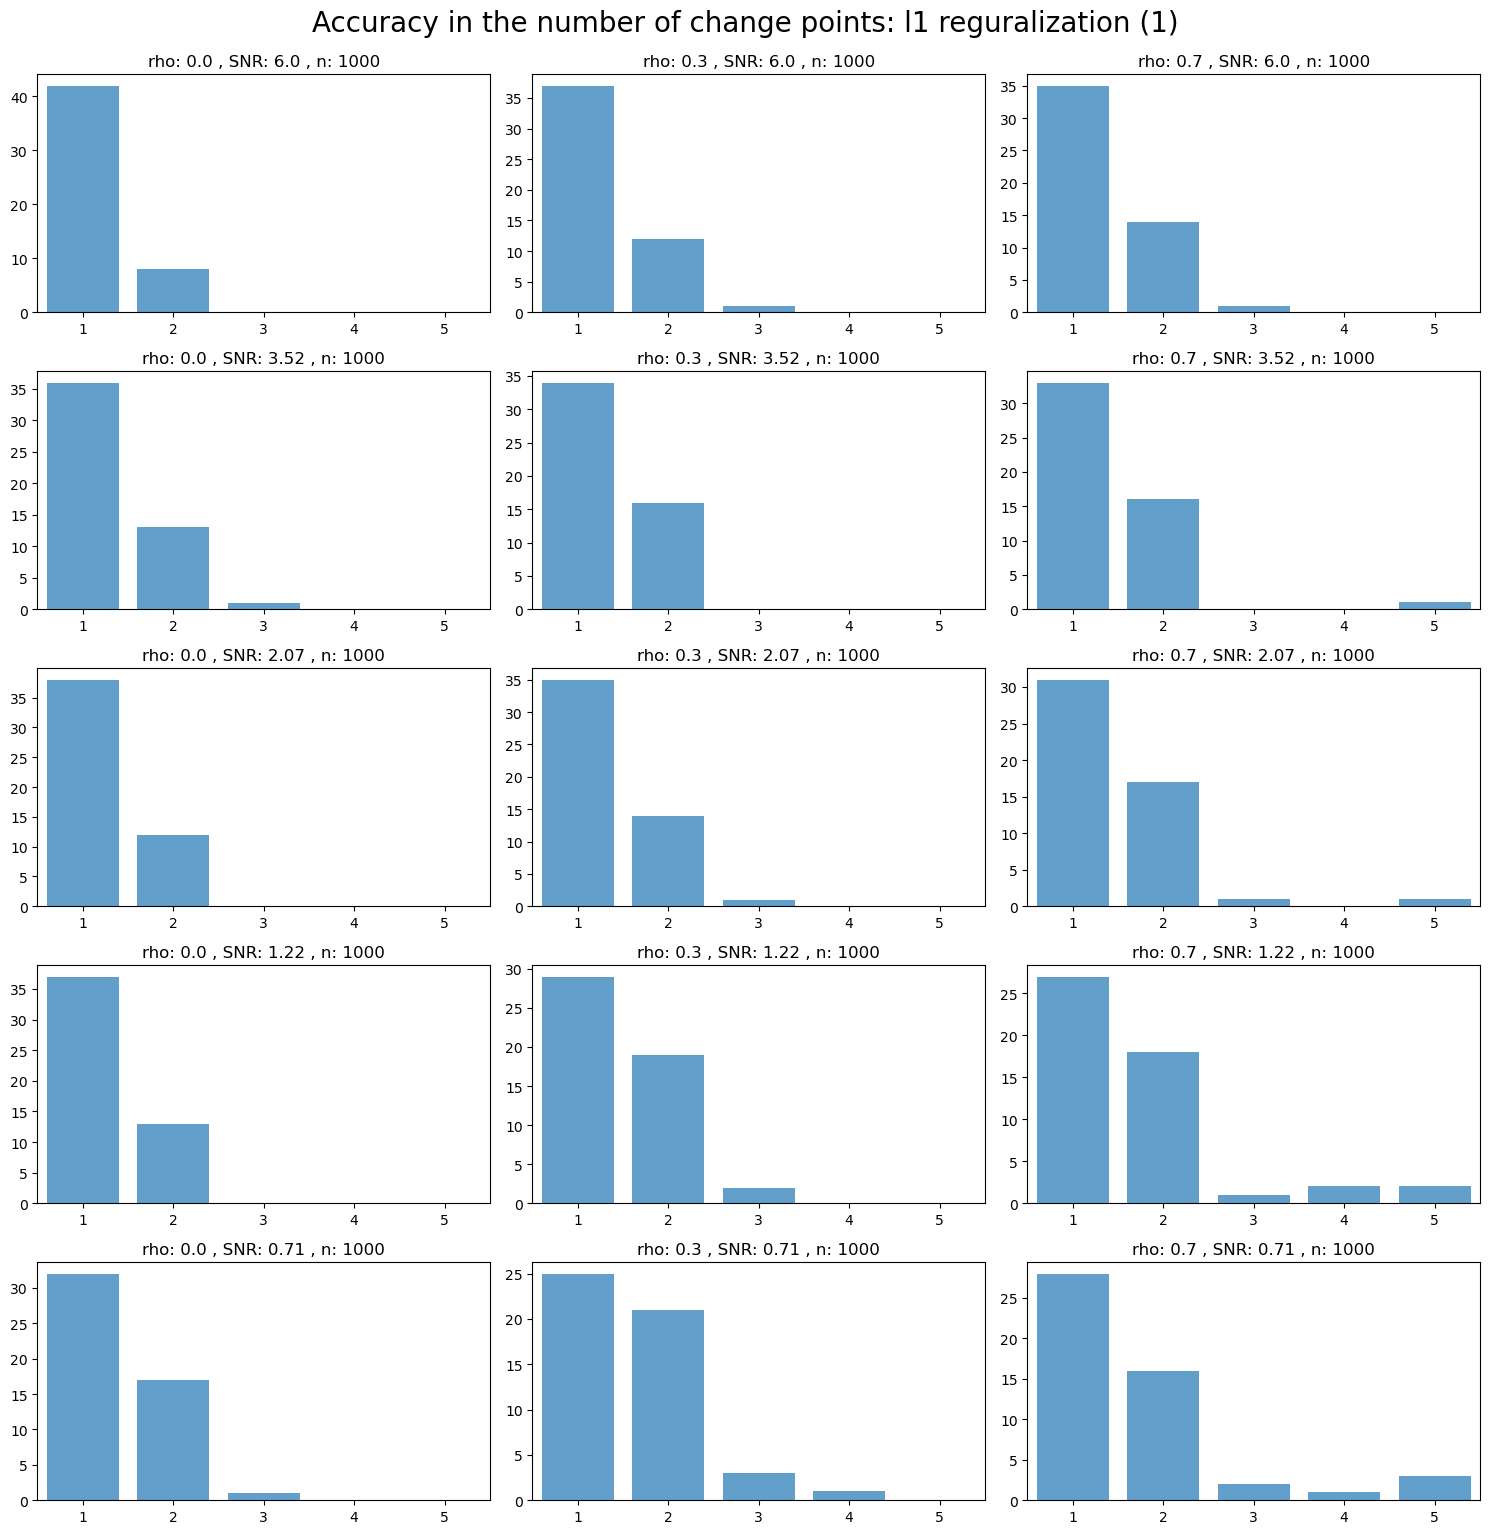

In [37]:
number_cps_plot(df_l1, name = "l1 reguralization (1)")

## Optimality Gap

Findings:

- Similar

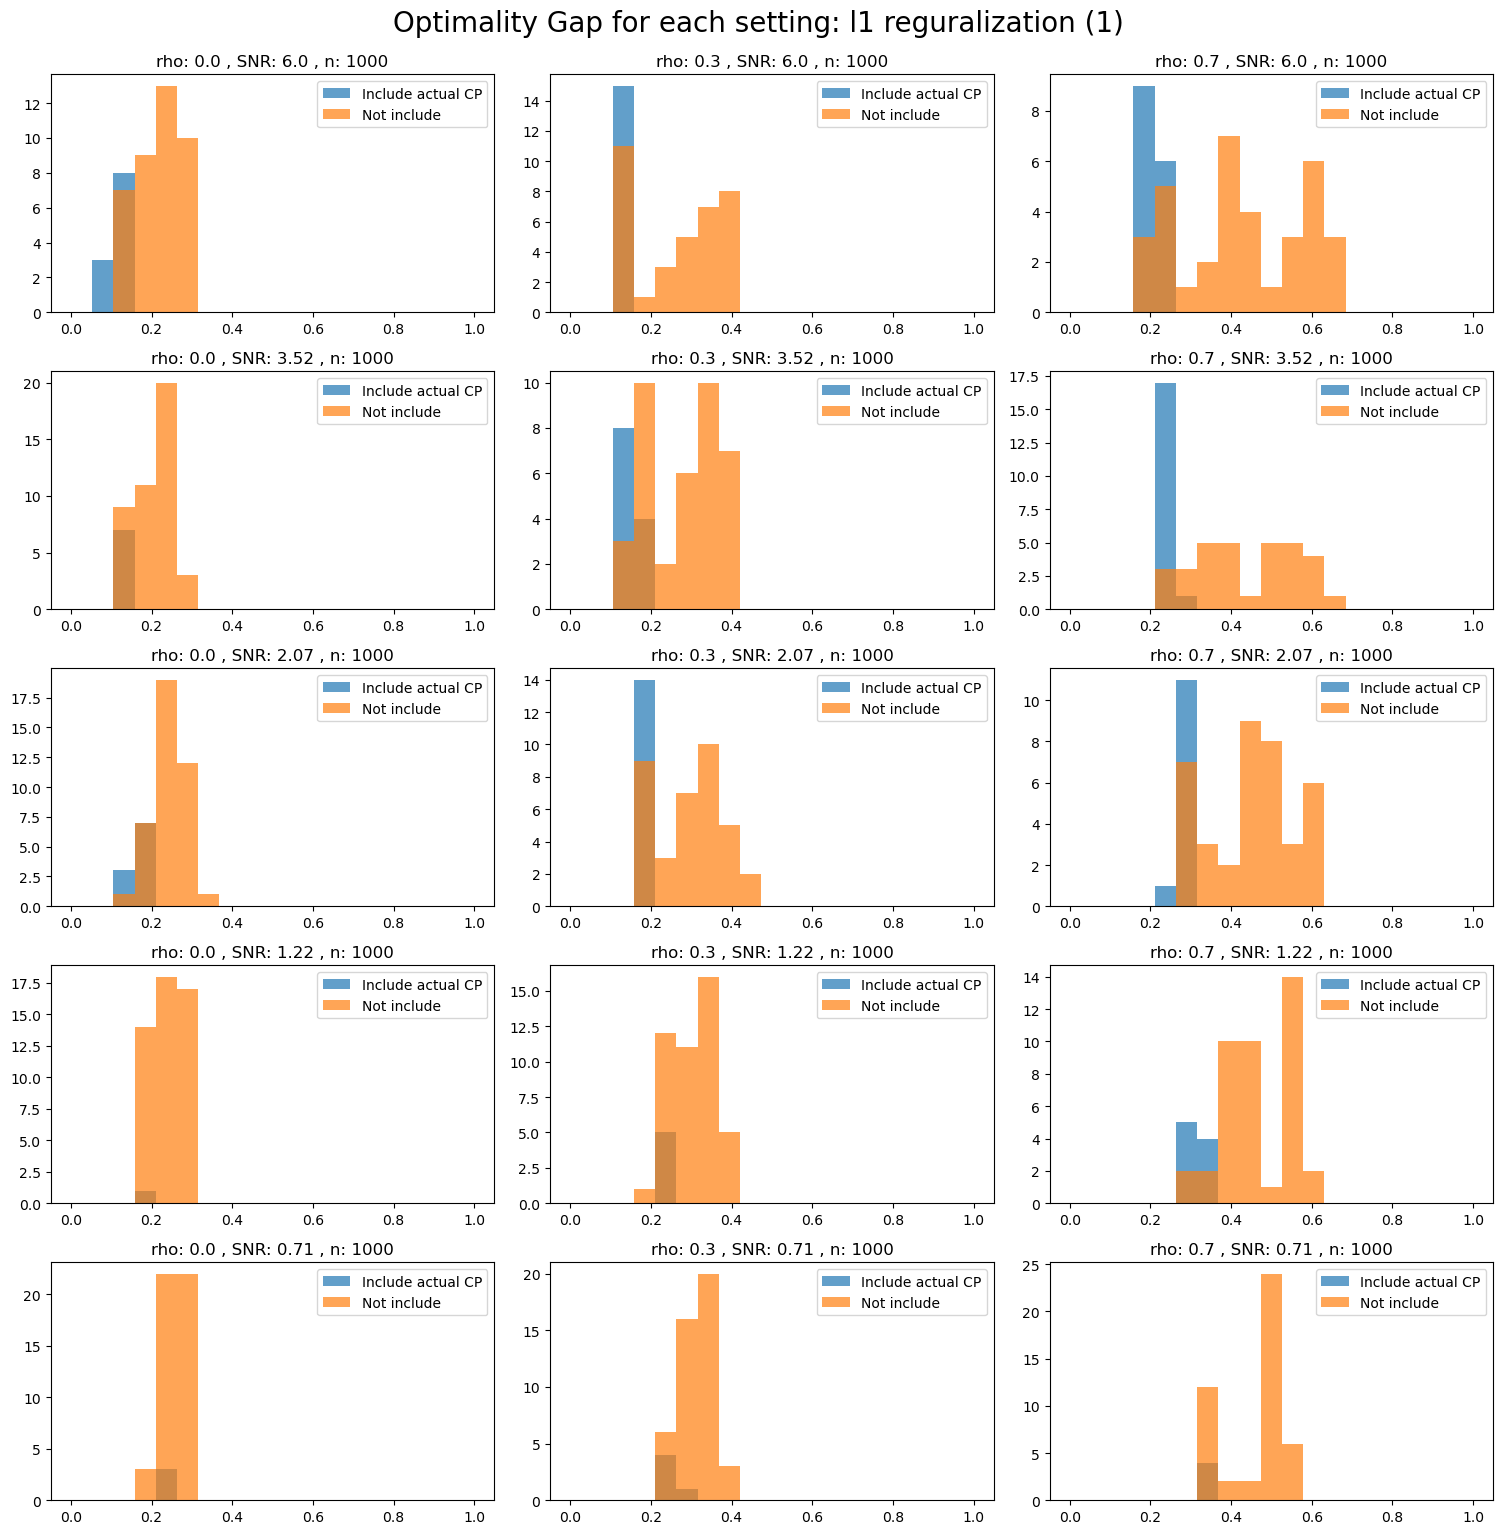

In [38]:
opt_gap_plot(df_l1, name = "l1 reguralization (1)")

# Our proposed method with l1 regularization

- we add l1 regularization in the formulation
- the $\lambda$ is $0.0005\times n = 0.5$
- 50 times for each simulation setting 

In [39]:
df_l1_05 = pd.read_csv('results/temp/simulation_five_variate_l1_reg_20230427.csv')
df_l1_05 = df_processing(df_l1_05)
df_l1_05

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,6,461.169491,0.0,6.00,1000,0.063932,[500],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,2,461.348191,0.0,6.00,1000,0.058078,[],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,1,461.573244,0.0,6.00,1000,0.068795,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,5,461.706818,0.0,6.00,1000,0.429748,[759],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,7,461.712884,0.0,6.00,1000,0.059299,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,48,432.564259,0.0,0.71,1000,0.311502,"[390, 396, 404, 836]",False,0,4,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,48,432.272159,0.3,0.71,1000,0.325451,"[418, 482, 948]",False,0,3,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,49,432.347010,0.3,0.71,1000,0.419023,"[274, 277, 355, 362]",False,0,4,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,48,433.177162,0.7,0.71,1000,0.608736,"[14, 265, 271, 719]",False,0,4,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [40]:
df_count_l1_05 = accuracy_table(df_l1_05)
df_count_l1_05

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,3,4,0.06,0.08
1,0.0,1.22,1000,4,5,0.08,0.10
2,0.0,2.07,1000,8,12,0.16,0.24
3,0.0,3.52,1000,14,14,0.28,0.28
4,0.0,6.00,1000,26,27,0.52,0.54
5,0.3,0.71,1000,4,4,0.08,0.08
6,0.3,1.22,1000,9,9,0.18,0.18
7,0.3,2.07,1000,13,13,0.26,0.26
8,0.3,3.52,1000,13,13,0.26,0.26
9,0.3,6.00,1000,25,25,0.50,0.50


In [41]:
accuracy_table(df_l1_05, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,26,27,0.52,0.54
14,0.7,6.00,1000,26,26,0.52,0.52
9,0.3,6.00,1000,25,25,0.50,0.50
13,0.7,3.52,1000,17,19,0.34,0.38
3,0.0,3.52,1000,14,14,0.28,0.28
12,0.7,2.07,1000,12,14,0.24,0.28
7,0.3,2.07,1000,13,13,0.26,0.26
8,0.3,3.52,1000,13,13,0.26,0.26
2,0.0,2.07,1000,8,12,0.16,0.24
6,0.3,1.22,1000,9,9,0.18,0.18


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

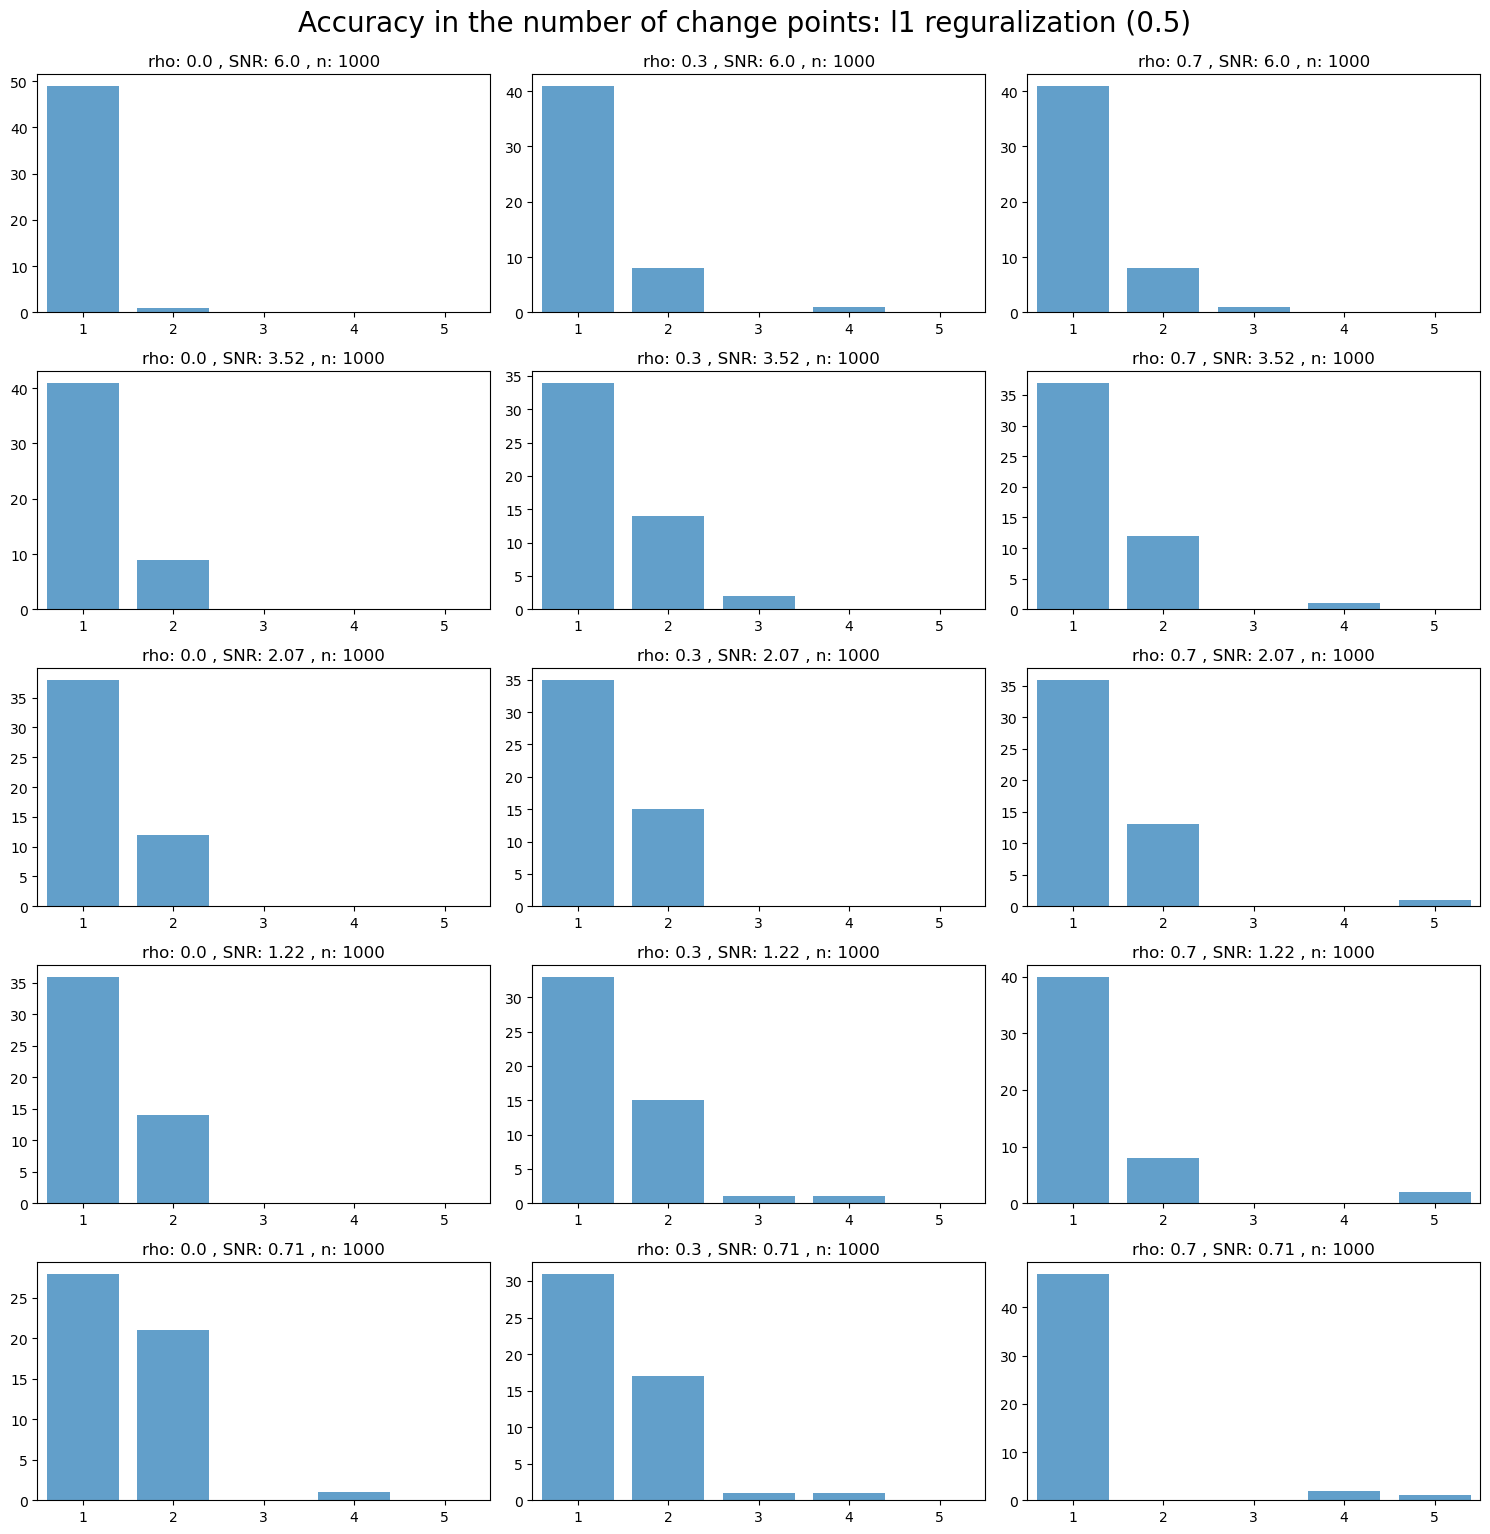

In [42]:
number_cps_plot(df_l1_05, name = "l1 reguralization (0.5)")

## Optimality Gap

Findings:

- Similar

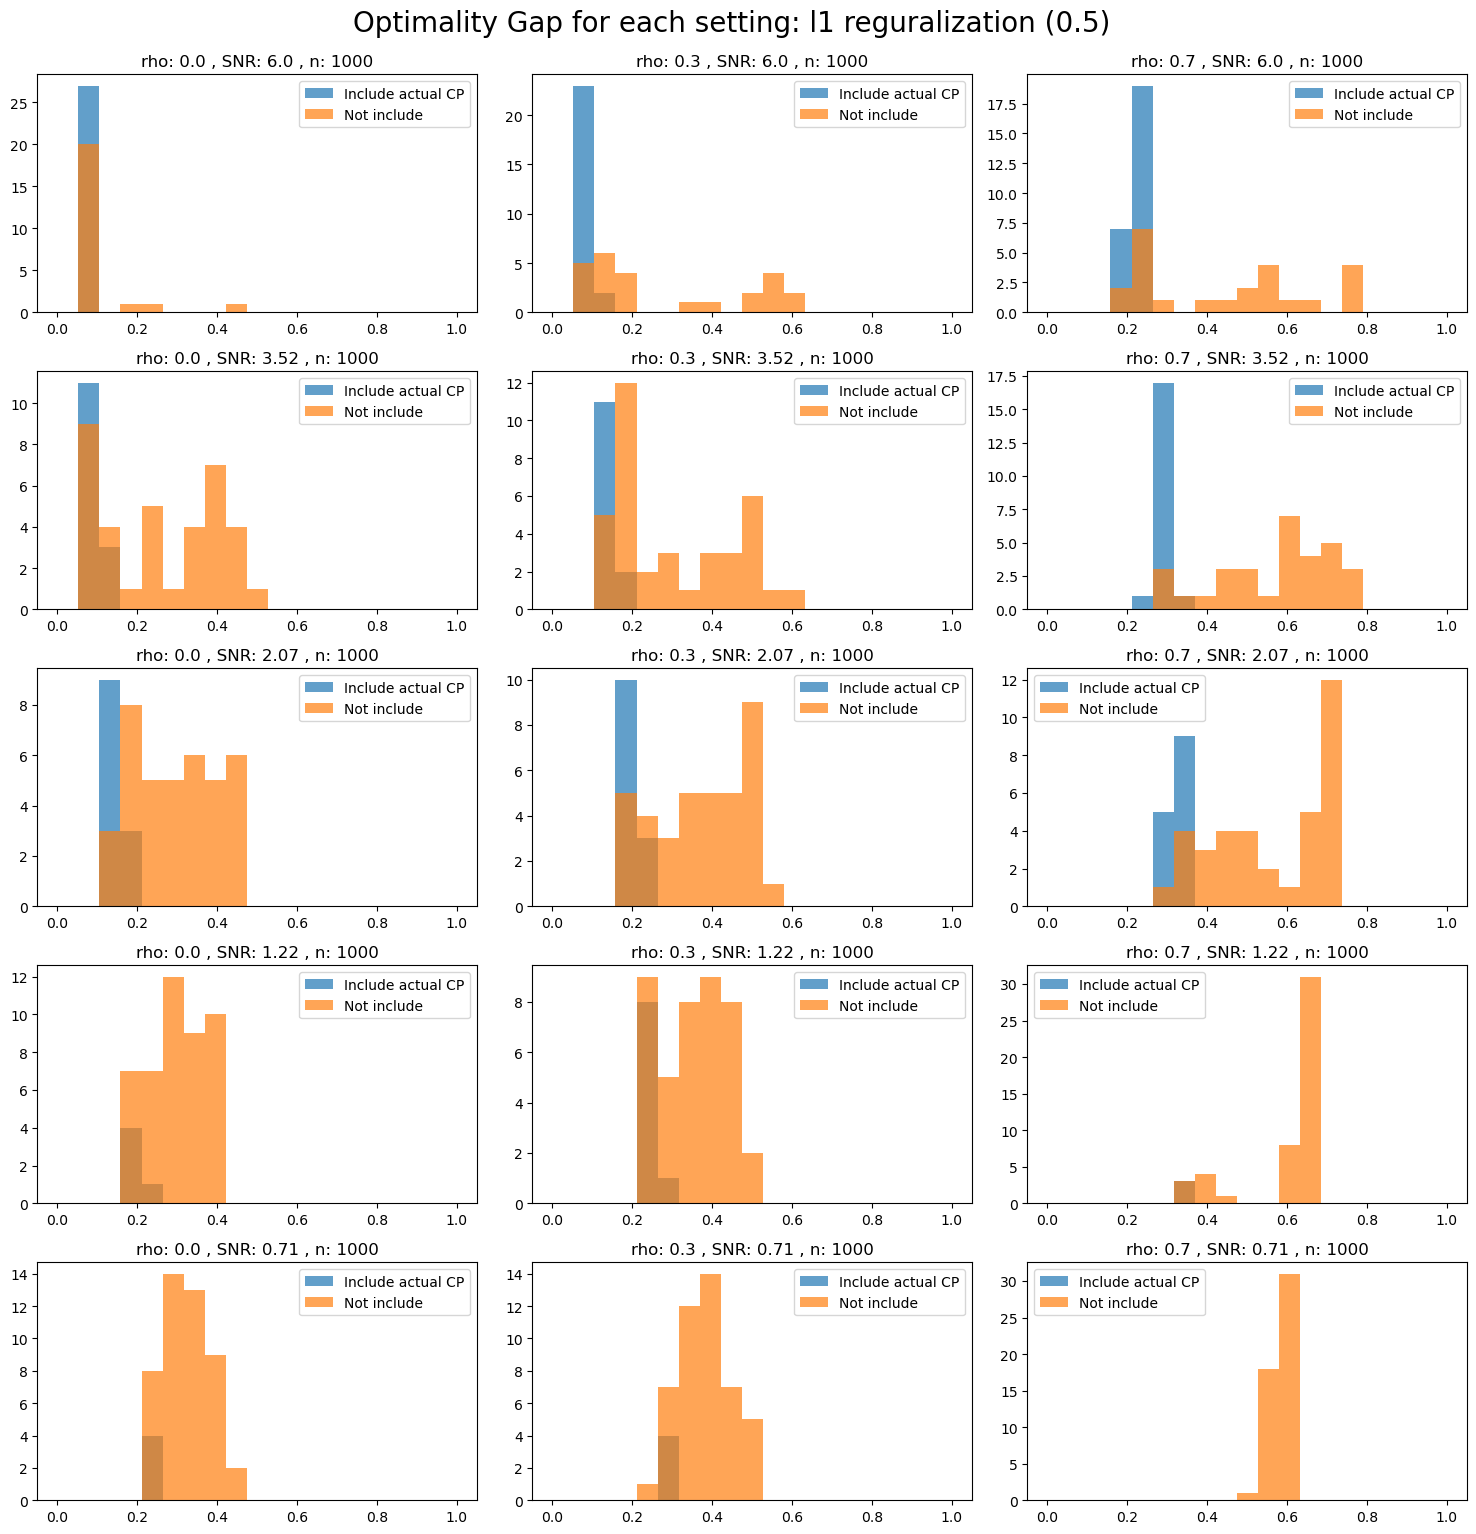

In [43]:
opt_gap_plot(df_l1_05, name = "l1 reguralization (0.5)")

# Our proposed method with different l1 regularization

- we add l1 regularization in the formulation
- the $\lambda$ is $0.0001\times n = 0.1$
- 50 times for each simulation setting 

In [44]:
df_l1_01 = pd.read_csv('results/temp/simulation_five_variate_l1_reg_20230425.csv')
df_l1_01 = df_processing(df_l1_01)
df_l1_01

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial,the number of detected change points,group
0,5,461.511350,0.0,6.00,1000,0.086730,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,6,461.928064,0.0,6.00,1000,0.093281,[500],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
2,0,462.049260,0.0,6.00,1000,0.074613,[499],True,1,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
3,4,462.142193,0.0,6.00,1000,0.068446,[496],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
4,3,462.277653,0.0,6.00,1000,0.118193,[500],False,0,1,"rho: 0.0 , SNR: 6.0 , n: 1000"
...,...,...,...,...,...,...,...,...,...,...,...
745,49,431.565204,0.0,0.71,1000,0.289268,[496],False,0,1,"rho: 0.0 , SNR: 0.71 , n: 1000"
746,48,433.150229,0.3,0.71,1000,0.575910,"[30, 33, 992]",False,0,3,"rho: 0.3 , SNR: 0.71 , n: 1000"
747,49,432.908381,0.3,0.71,1000,0.561718,"[3, 82, 88, 113, 125]",False,0,5,"rho: 0.3 , SNR: 0.71 , n: 1000"
748,48,433.050288,0.7,0.71,1000,0.645678,"[12, 288, 293, 439, 442]",False,0,5,"rho: 0.7 , SNR: 0.71 , n: 1000"


## Accuracy

Findings:


In [45]:
df_count_l1_01 = accuracy_table(df_l1_01)
df_count_l1_01

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,4,6,0.08,0.12
1,0.0,1.22,1000,6,6,0.12,0.12
2,0.0,2.07,1000,10,10,0.20,0.20
3,0.0,3.52,1000,27,27,0.54,0.54
4,0.0,6.00,1000,36,36,0.72,0.72
5,0.3,0.71,1000,1,3,0.02,0.06
6,0.3,1.22,1000,6,7,0.12,0.14
7,0.3,2.07,1000,18,18,0.36,0.36
8,0.3,3.52,1000,19,20,0.38,0.40
9,0.3,6.00,1000,32,32,0.64,0.64


In [46]:
accuracy_table(df_l1_01, sort = True)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,36,36,0.72,0.72
9,0.3,6.00,1000,32,32,0.64,0.64
14,0.7,6.00,1000,29,32,0.58,0.64
3,0.0,3.52,1000,27,27,0.54,0.54
8,0.3,3.52,1000,19,20,0.38,0.40
13,0.7,3.52,1000,7,19,0.14,0.38
7,0.3,2.07,1000,18,18,0.36,0.36
2,0.0,2.07,1000,10,10,0.20,0.20
6,0.3,1.22,1000,6,7,0.12,0.14
0,0.0,0.71,1000,4,6,0.08,0.12


## Estimated number of change points


Findings:

- overestimation of # of cps are improved.

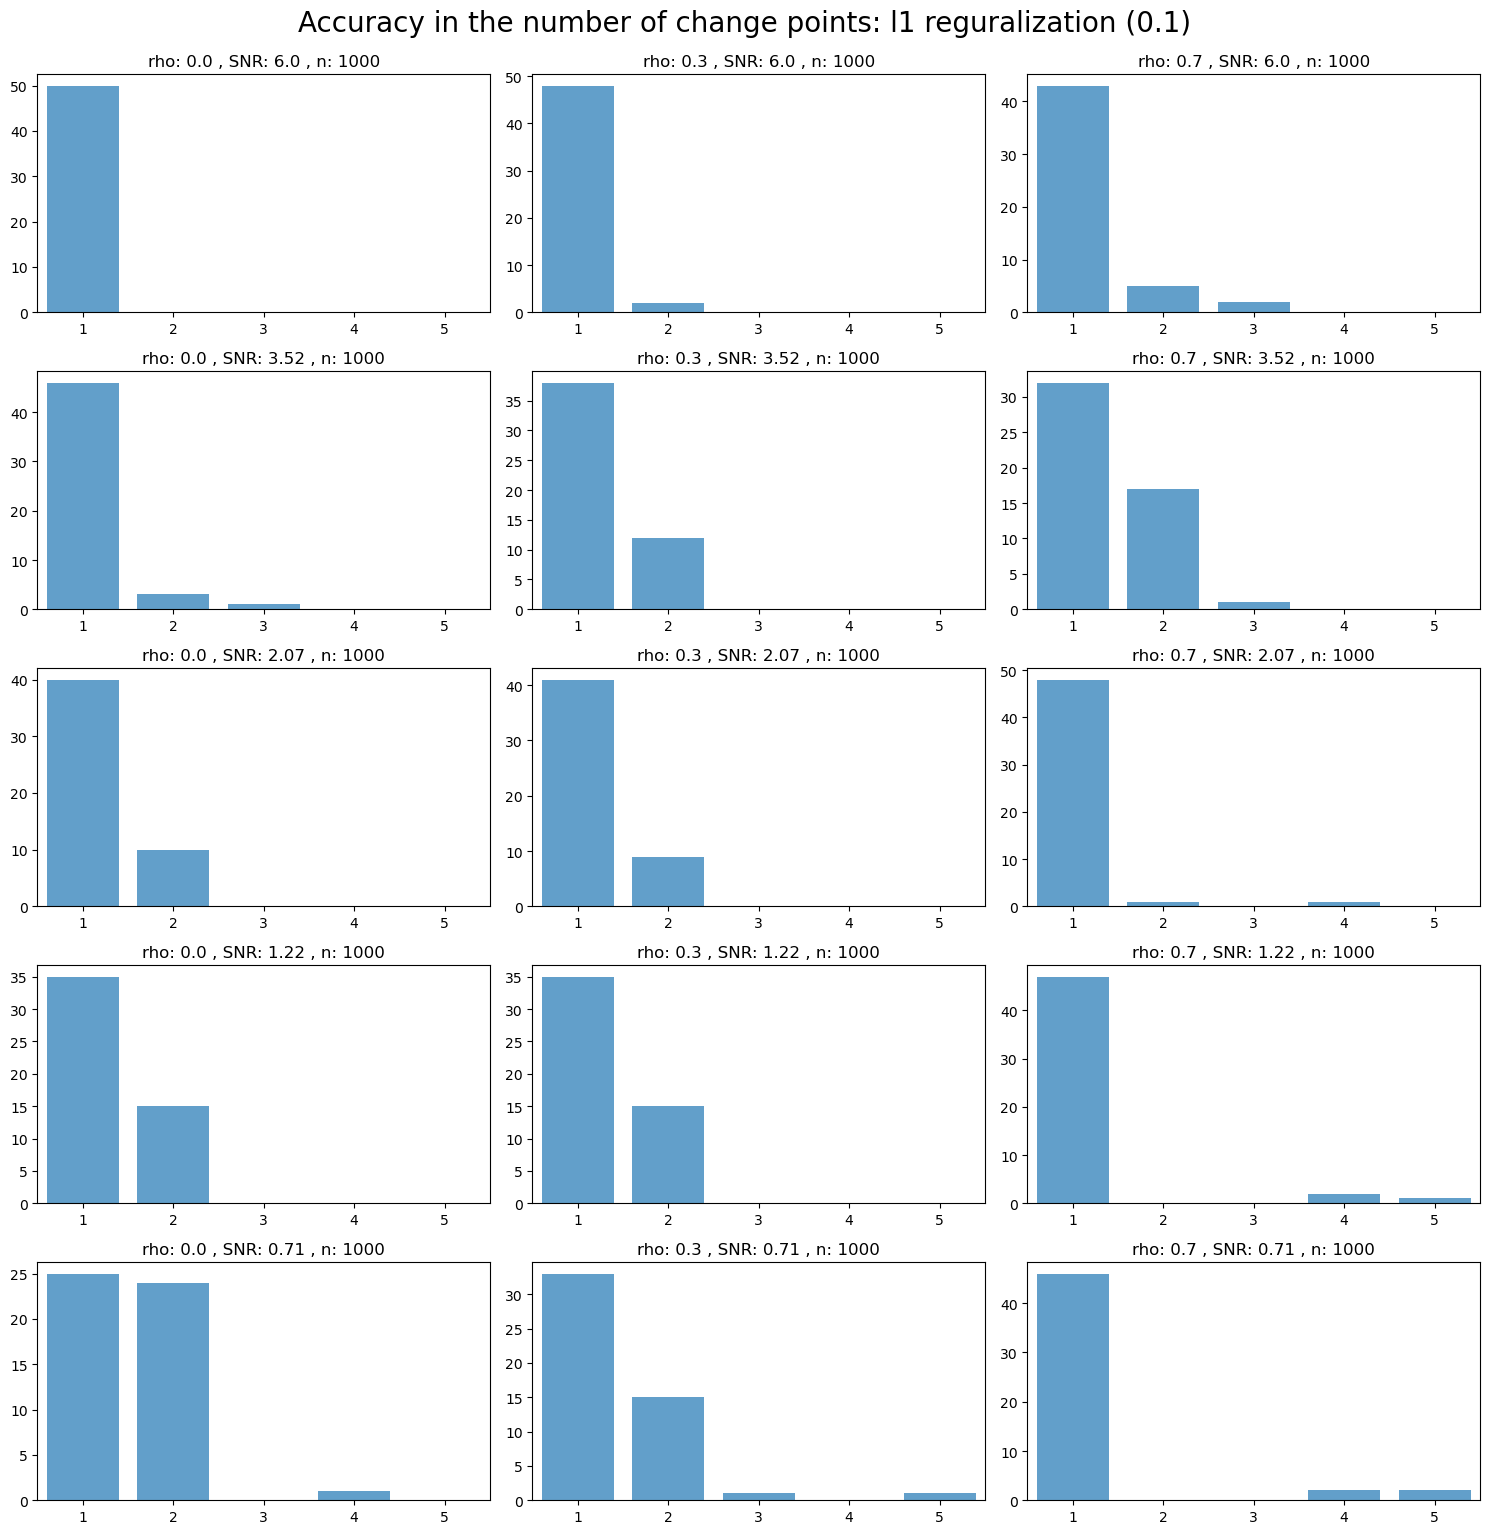

In [47]:
number_cps_plot(df_l1_01, name = "l1 reguralization (0.1)")

## Optimality Gap

Findings:

- Similar

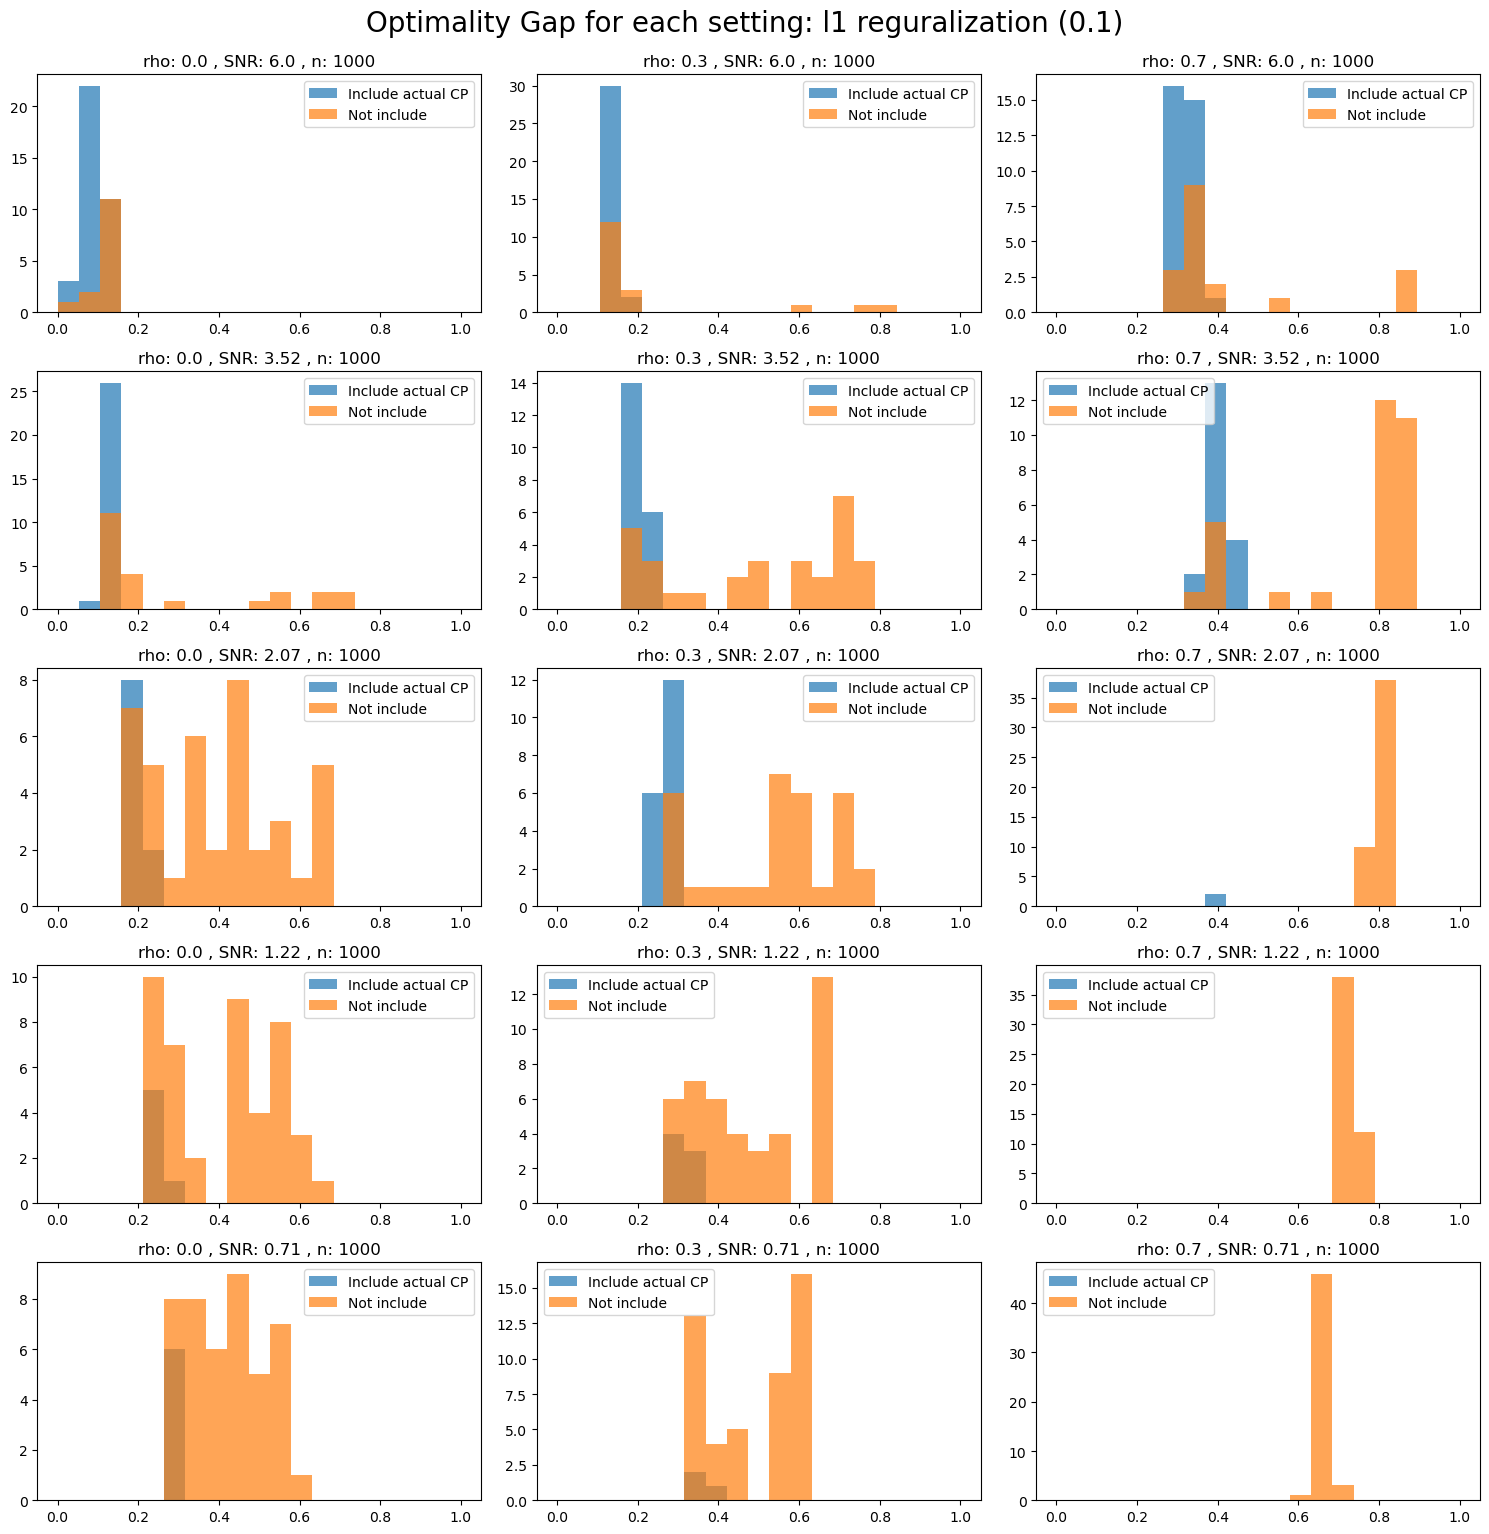

In [48]:
opt_gap_plot(df_l1_01, name = "l1 reguralization (0.1)")

# Comparison

In [49]:
df_count["method"] = "base"
df_count_quad["method"] = "sq penalty"
df_count_sqM["method"] = "sq bigM"
df_count_l2["method"] = r"$l$2 (1)"
df_count_l2_01["method"] = r"$l$2 (0.1)"
df_count_l2_05["method"] = r"$l$2 (0.5)"
df_count_l1["method"] = r"$l$1 (1)"
df_count_l1_05["method"] = r"$l$1 (0.5)"
df_count_l1_01["method"] = r"$l$1 (0.1)"

df_plot = pd.concat([df_count, df_count_quad, df_count_sqM, df_count_l2, df_count_l2_05, df_count_l2_01, df_count_l1, df_count_l1_05, df_count_l1_01], ignore_index = True)

df_plot["group"] = "rho: " + df_plot["rho"].astype(str) + " , SNR: " + df_plot["SNR"].astype(str) + " , n: " + df_plot["n"].astype(str)
df_plot

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,6.00,1000,364,366,0.728,0.732,base,"rho: 0.0 , SNR: 6.0 , n: 1000"
1,0.3,6.00,1000,334,337,0.668,0.674,base,"rho: 0.3 , SNR: 6.0 , n: 1000"
2,0.7,6.00,1000,304,324,0.608,0.648,base,"rho: 0.7 , SNR: 6.0 , n: 1000"
3,0.0,3.52,1000,261,265,0.522,0.530,base,"rho: 0.0 , SNR: 3.52 , n: 1000"
4,0.7,3.52,1000,231,264,0.462,0.528,base,"rho: 0.7 , SNR: 3.52 , n: 1000"
...,...,...,...,...,...,...,...,...,...
130,0.7,0.71,1000,0,0,0.000,0.000,$l$1 (0.1),"rho: 0.7 , SNR: 0.71 , n: 1000"
131,0.7,1.22,1000,0,0,0.000,0.000,$l$1 (0.1),"rho: 0.7 , SNR: 1.22 , n: 1000"
132,0.7,2.07,1000,1,2,0.020,0.040,$l$1 (0.1),"rho: 0.7 , SNR: 2.07 , n: 1000"
133,0.7,3.52,1000,7,19,0.140,0.380,$l$1 (0.1),"rho: 0.7 , SNR: 3.52 , n: 1000"


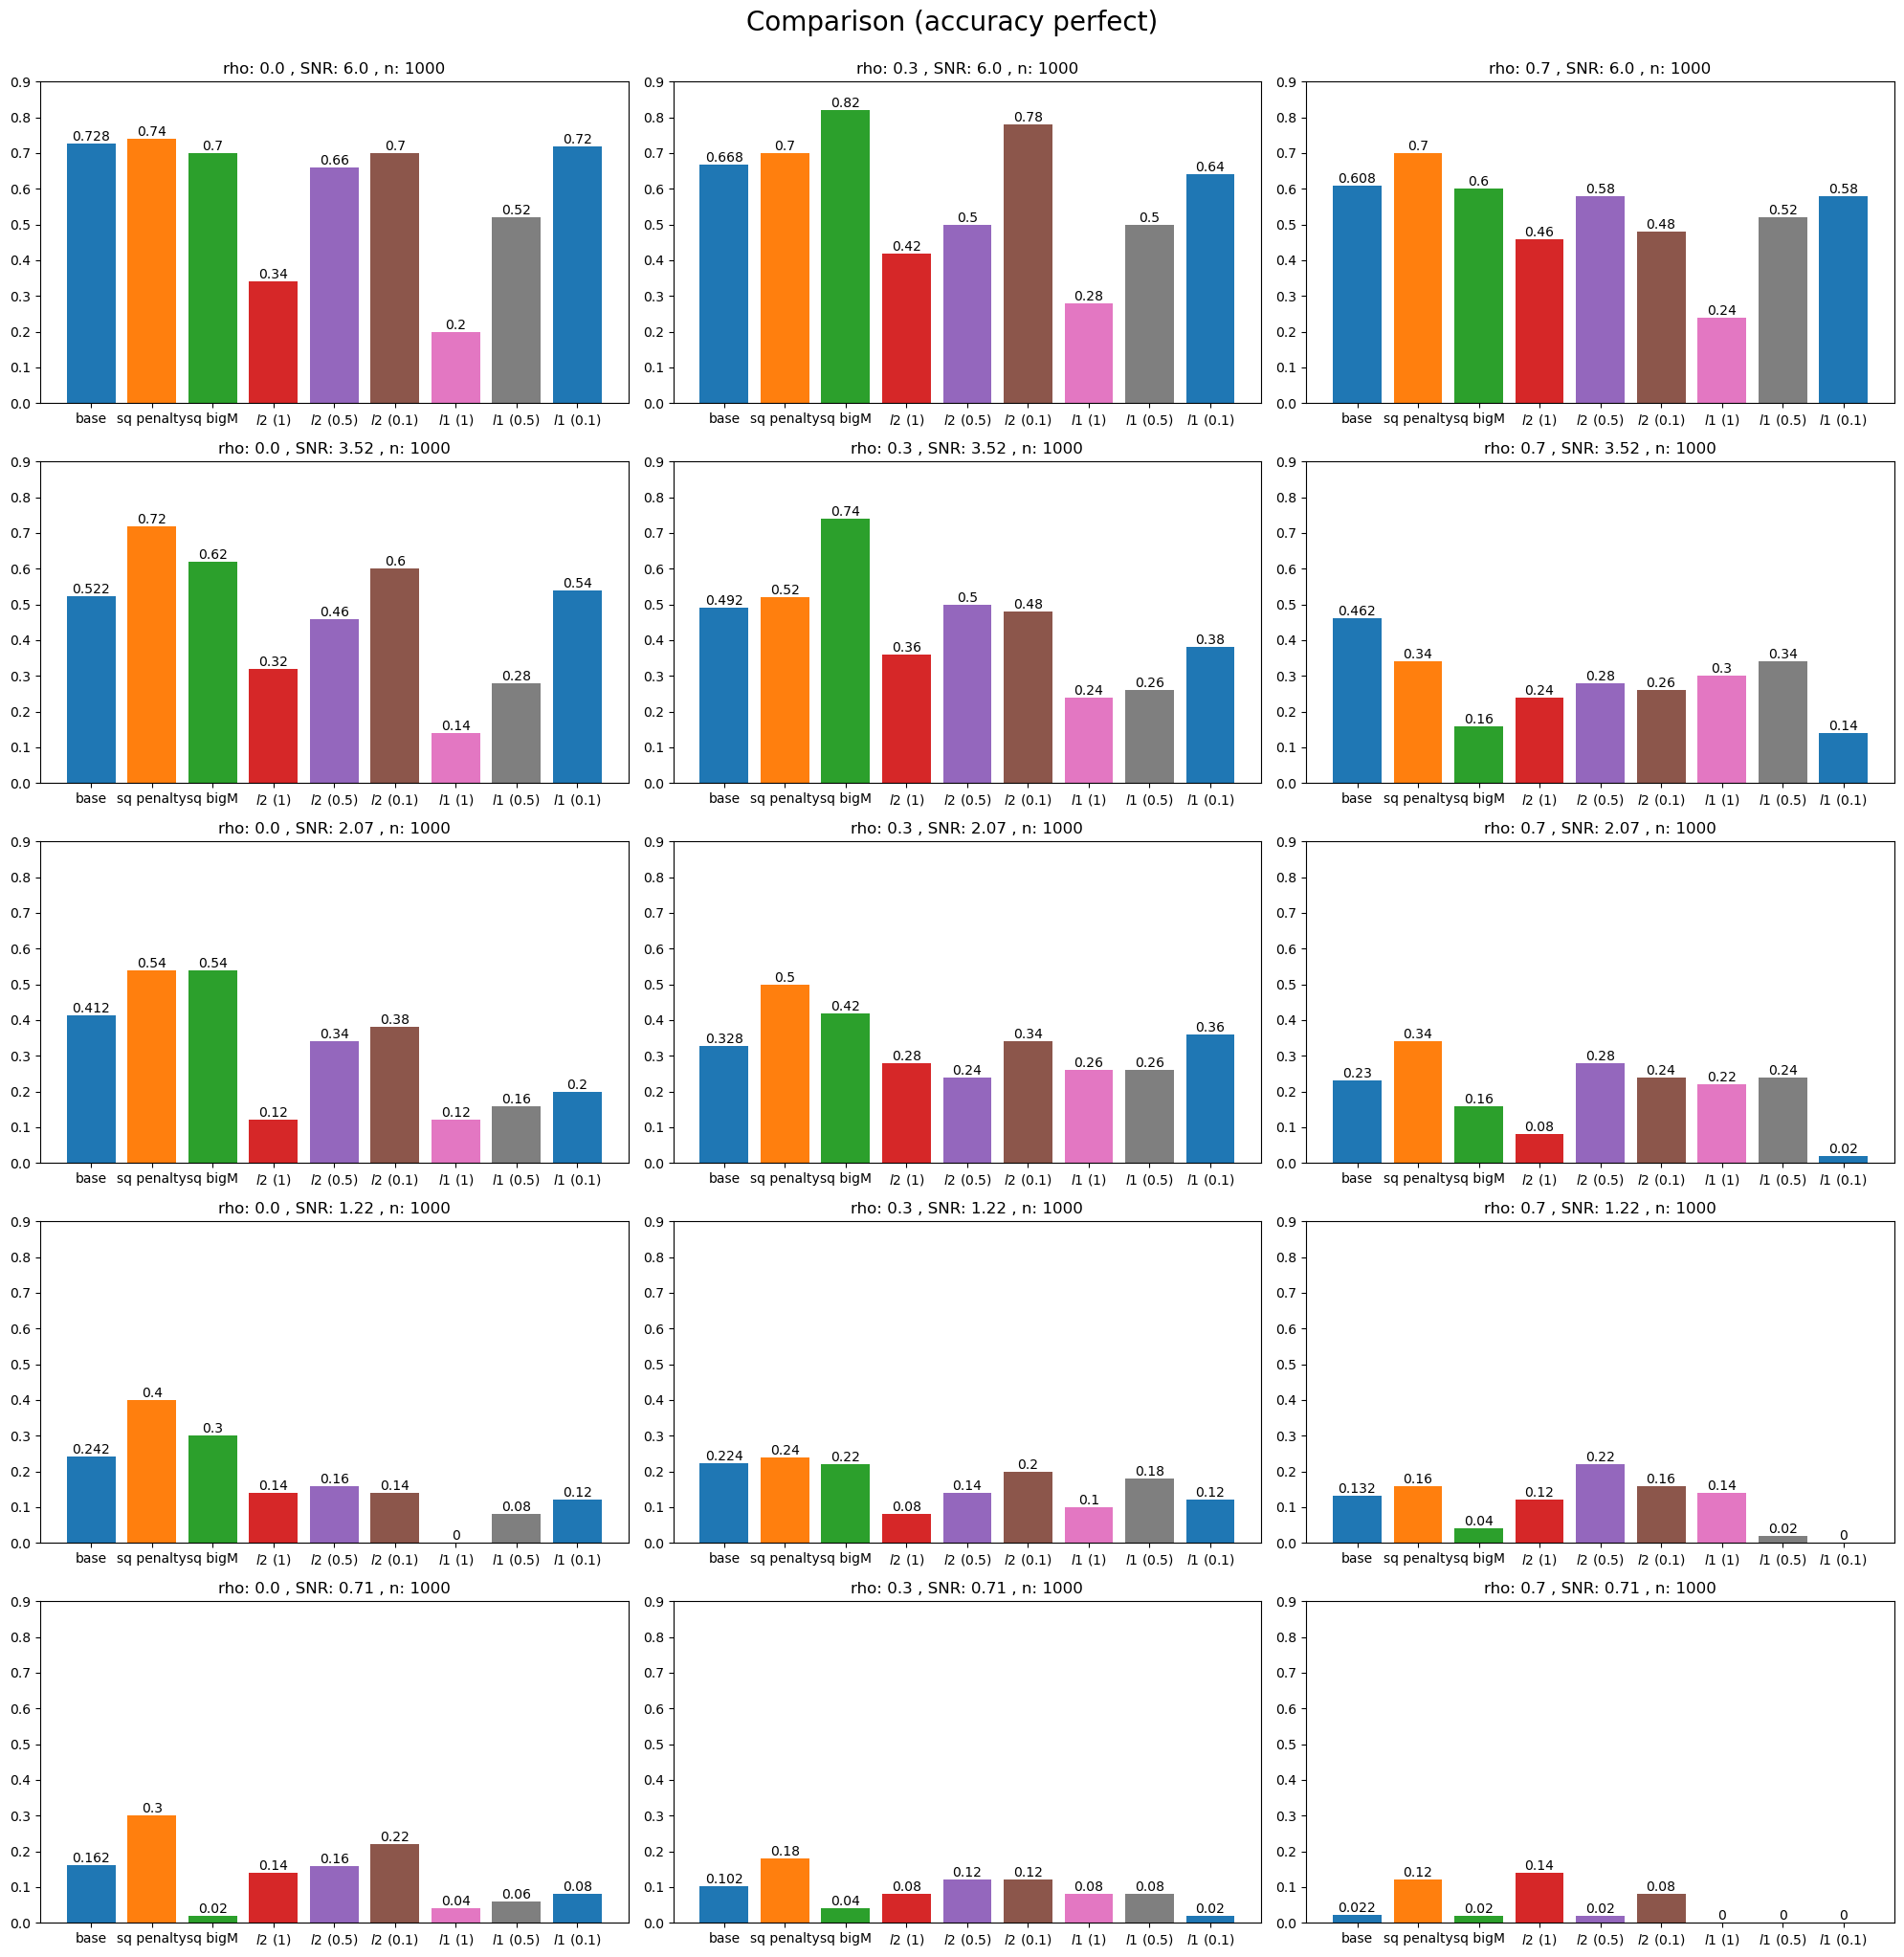

In [50]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy perfect)", fontsize=20).set_y(1.02)
plt.show()

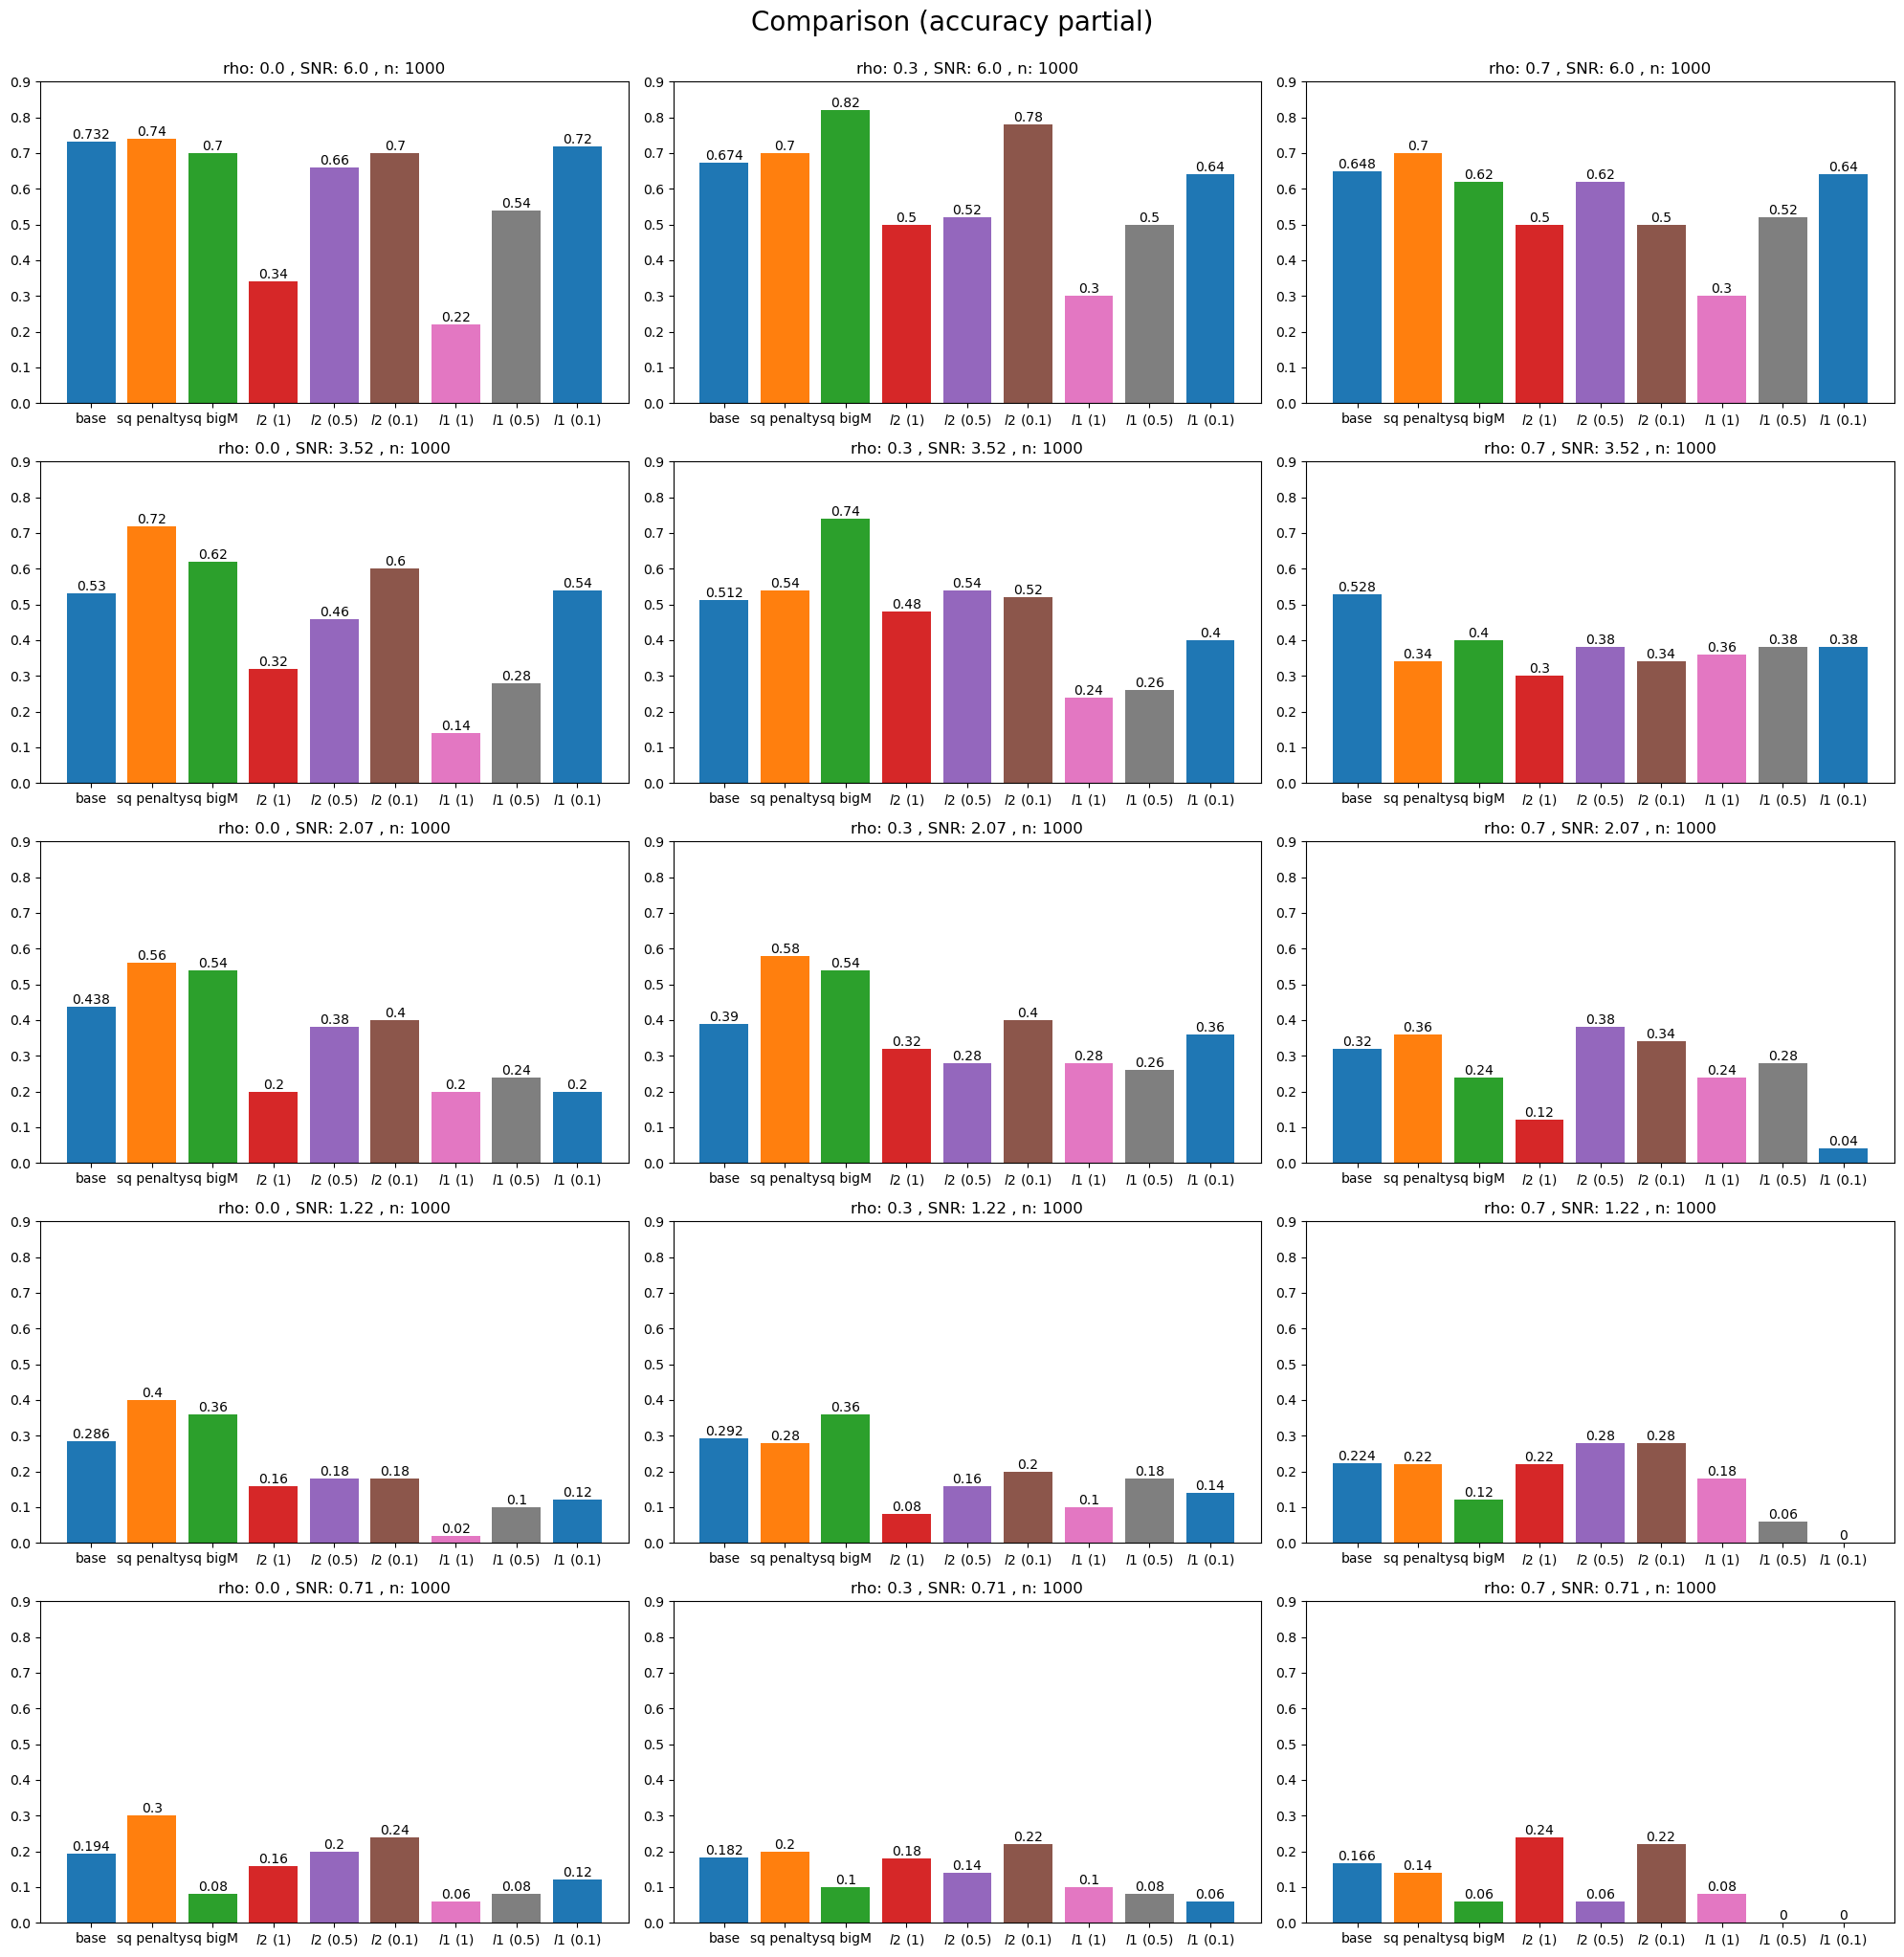

In [51]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy partial)", fontsize=20).set_y(1.02)
plt.show()